# Predicting the Sale Price of cars using Machine Learning üöó üíµ

## Context
---
Dubizzle is a well known platform for UAE which allows people buy and sell all kind of goods including cars. 

## Problem Definition
---
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting the future sale price of a car, given its characteristics and previous examples of how much similar car have been sold <ins>(assuming that no negoitaion happened and the car sold for the listed price)</ins> for using Dubizzle Platform. Since we're trying to predict the sale price of a car which is a number, this kind of problem is known as a **regression problem**.

## Data
---
The sample dataset is taken from the [Kaggle](https://www.kaggle.com/datasets/alihassankp/dubizzle-used-car-sale-data). The dataset has 20 columns. It has 19  features to be used predicting the label which is price_in_aed column in the dataset. You can see the data dictionary [here](Data/README.md).


## Import Libraries

We're going to use:
- [pandas](https://pandas.pydata.org/) for data analysis.
- [NumPy](https://numpy.org/) for numerical operations.
- [Matplotlib](https://matplotlib.org/) / [seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
- [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
# Configure default settings for plots
sb.set(style="ticks")
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

# Preprocessing the data
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

# Linear Models from Scikit-Learn
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet

# Non-linear Models from Scikit-Learn
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# Ensemble Models from Scikit-Learn
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Model Evaluation
from sklearn.metrics import r2_score, mean_squared_error

# Load Data

In [2]:
raw_data = pd.read_csv('Data/data.csv')
df = raw_data.copy()

# Sanity Check

In [3]:
df.head()

title price_in_aed  kilometers  \
0                      MITSUBISHI PAJERO 3.5L / 2013       26,000      167390   
1                                chevrolet silverado      110,000       39000   
2  MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...       78,000      200000   
3  WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...      899,000       27000   
4                           USED RENAULT DOKKER 2020       33,000       69000   

           body_condition    mechanical_condition seller_type  \
0  Perfect inside and out  Perfect inside and out      Dealer   
1  Perfect inside and out  Perfect inside and out      Dealer   
2  Perfect inside and out  Perfect inside and out      Dealer   
3  Perfect inside and out  Perfect inside and out      Dealer   
4  Perfect inside and out  Perfect inside and out       Owner   

              body_type no_of_cylinders       transmission_type  \
0                   SUV               6  Automatic Transmission   
1                   SUV               8  Automatic Transmission   
2                 Sedan               6  Automatic Transmission   
3  Hard Top Convertible               8  Automatic Transmission   
4                 Wagon               4     Manual Transmission   

         regional_specs        horsepower fuel_type   steering_side     year  \
0             GCC Specs           Unknown  Gasoline  Left Hand Side 2013.000   
1  North American Specs      400 - 500 HP  Gasoline  Left Hand Side 2018.000   
2             GCC Specs      400 - 500 HP  Gasoline  Left Hand Side 2014.000   
3             GCC Specs      600 - 700 HP  Gasoline  Left Hand Side 2018.000   
4             GCC Specs  Less than 150 HP  Gasoline  Left Hand Side 2020.000   

    color   emirate        motors_trim        company       model date_posted  
0  Silver     Dubai                GLS     mitsubishi      pajero  13/05/2022  
1   White   Sharjah  1500 High Country      chevrolet   silverado  14/01/2022  
2    Blue   Sharjah              E 300  mercedes-benz     e-class  05/05/2022  
3     Red     Dubai           Standard        ferrari  488-spider  30/04/2022  
4   White     Dubai           Standard        renault      dokker  13/05/2022

In [4]:
df.tail()

title price_in_aed  \
9965  AED7525month | 2015 Land Rover Range Rover Aut...      215,000   
9966             LOW MILEAGE Cadillac Escalade Platinum       90,000   
9967  WARRANTY AVAILABLE || Range Rover Sport SVR Ca...      679,000   
9968                         Chevrolet Malibu  GCC Spec       18,900   
9969  LOW MILEAGE! PERFECT CONDITION! Jeep Wrangler ...       77,700   

      kilometers                 body_condition    mechanical_condition  \
9965      105777         Perfect inside and out  Perfect inside and out   
9966       55640         Perfect inside and out  Perfect inside and out   
9967         100         Perfect inside and out  Perfect inside and out   
9968      140000  No accidents, very few faults  Perfect inside and out   
9969       86000         Perfect inside and out  Perfect inside and out   

     seller_type  body_type no_of_cylinders       transmission_type  \
9965      Dealer        SUV               8  Automatic Transmission   
9966       Owner        SUV               8  Automatic Transmission   
9967      Dealer        SUV               8  Automatic Transmission   
9968       Owner      Sedan               4  Automatic Transmission   
9969      Dealer  Crossover               6     Manual Transmission   

     regional_specs    horsepower fuel_type   steering_side     year   color  \
9965      GCC Specs  500 - 600 HP  Gasoline  Left Hand Side 2015.000   White   
9966      GCC Specs  400 - 500 HP  Gasoline  Left Hand Side 2014.000   White   
9967          Other  400 - 500 HP  Gasoline  Left Hand Side      NaN   Black   
9968      GCC Specs  150 - 200 HP  Gasoline  Left Hand Side 2013.000   White   
9969      GCC Specs  200 - 300 HP  Gasoline  Left Hand Side 2013.000  Orange   

     emirate    motors_trim     company              model date_posted  
9965   Dubai  Autobiography  land-rover        range-rover  18/11/2021  
9966   Dubai       Platinum    cadillac           escalade  11/05/2022  
9967   Dubai            SVR  land-rover  range-rover-sport  14/12/2021  
9968   Dubai             LS   chevrolet             malibu  06/03/2022  
9969   Dubai         Sahara        jeep           wrangler  04/12/2021

In [5]:
df.sample(10)

title price_in_aed  \
3682  Range Rover Evoque Pure | Under Warranty, Serv...      120,000   
4604          AED 680 PM | 0% DP | 1.5L SV GCC WARRANTY       34,900   
8872  2016 Audi R8 Coupe V10 Plus, Warranty, Full Se...      415,000   
4054  AED 2,780 Per Month / 0% D.P | ORIGINAL PAINT ...      142,000   
9049                                      nissan patrol      255,000   
6058                                    lexus rx-series       18,000   
3625                           Land Rover Defender 2008      139,000   
2417  AED1172/Month | 2017 Mitsubishi Pajero GLS 3.5...       63,900   
8049        Ford Escape SE 2020, Economical Low mileage       54,000   
2532  HONDA ODYSSEY TOURING BLUE 2015 - GCC SPECIFIC...       73,500   

      kilometers                      body_condition    mechanical_condition  \
3682       63000  A bit of wear & tear, all repaired  Perfect inside and out   
4604      138609              Perfect inside and out  Perfect inside and out   
8872       62824              Perfect inside and out  Perfect inside and out   
4054       50000              Perfect inside and out  Perfect inside and out   
9049       49000              Perfect inside and out  Perfect inside and out   
6058      250000              Perfect inside and out  Perfect inside and out   
3625       38000              Perfect inside and out  Perfect inside and out   
2417      117638              Perfect inside and out  Perfect inside and out   
8049       17000              Perfect inside and out  Perfect inside and out   
2532       96000              Perfect inside and out  Perfect inside and out   

     seller_type body_type no_of_cylinders       transmission_type  \
3682       Owner       SUV               4  Automatic Transmission   
4604      Dealer     Sedan               4  Automatic Transmission   
8872      Dealer     Coupe              10  Automatic Transmission   
4054      Dealer     Coupe               8     Manual Transmission   
9049      Dealer       SUV               8  Automatic Transmission   
6058      Dealer       SUV               6  Automatic Transmission   
3625      Dealer       SUV               4     Manual Transmission   
2417      Dealer       SUV               6  Automatic Transmission   
8049       Owner     Other               3  Automatic Transmission   
2532      Dealer       Van               6  Automatic Transmission   

            regional_specs        horsepower fuel_type   steering_side  \
3682             GCC Specs      200 - 300 HP  Gasoline  Left Hand Side   
4604             GCC Specs  Less than 150 HP  Gasoline  Left Hand Side   
8872             GCC Specs      600 - 700 HP  Gasoline  Left Hand Side   
4054             GCC Specs      300 - 400 HP  Gasoline  Left Hand Side   
9049             GCC Specs      300 - 400 HP  Gasoline  Left Hand Side   
6058             GCC Specs      200 - 300 HP  Gasoline  Left Hand Side   
3625             GCC Specs           Unknown    Diesel  Left Hand Side   
2417             GCC Specs      150 - 200 HP  Gasoline  Left Hand Side   
8049  North American Specs           Unknown  Gasoline  Left Hand Side   
2532             GCC Specs      200 - 300 HP  Gasoline  Left Hand Side   

         year   color   emirate  motors_trim     company               model  \
3682 2018.000   White     Dubai        Other  land-rover  range-rover-evoque   
4604 2019.000   White     Dubai           SV      nissan               sunny   
8872 2016.000  Yellow     Dubai  Sports Plus        audi                  r8   
4054 2018.000   Black     Dubai           GT        ford             mustang   
9049 2020.000   White     Ajman  LE Platinum      nissan              patrol   
6058 2005.000  Silver   Sharjah        Other       lexus           rx-series   
3625 2008.000   Black     Dubai           90  land-rover            defender   
2417 2017.000   White     Dubai          GLS  mitsubishi              pajero   
8049 2020.000  Silver     Dubai           SE        ford              

## Shape of the Data

In [6]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 9970 rows and 20 columns


## Data Types

In [7]:
# Write the info of the dataframe into a text file
# It will make our job easy while exploring the data
import io
buffer = io.StringIO()
df.info(buf=buffer)
s = buffer.getvalue()
with open("Data/df_info.txt", "w", encoding="utf-8") as f:
  f.write(s)

# Print it to the console
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 9965 non-null   object 
 1   price_in_aed          9970 non-null   object 
 2   kilometers            9970 non-null   int64  
 3   body_condition        9970 non-null   object 
 4   mechanical_condition  9970 non-null   object 
 5   seller_type           9970 non-null   object 
 6   body_type             9970 non-null   object 
 7   no_of_cylinders       9911 non-null   object 
 8   transmission_type     9970 non-null   object 
 9   regional_specs        9970 non-null   object 
 10  horsepower            9970 non-null   object 
 11  fuel_type             9970 non-null   object 
 12  steering_side         9970 non-null   object 
 13  year                  9000 non-null   float64
 14  color                 9970 non-null   object 
 15  emirate              

### üîé Data Types Observations

- **title** column is not relevant as it's a text which was provided by the seller and it should be removed.
- **price_in_aed** is `object` which should be `int`. It's mainly because of the comma (,) separator in the numbers. 
- **year** should be `int` not `float64`.
- I would keep **date_posted** if we were predicting how much time it would take to sell car or if we had the sold-price after negotiation, but it's a problem for some other time.


In [8]:
# Dropping the columns
df.drop(columns=['title', 'date_posted'], inplace=True)

In [9]:
# Removing comman from the column and converting it to type int
df['price_in_aed'] = df['price_in_aed'].str.replace(',', '').astype(int)

In [10]:
df['year'] = df['year'].astype(int, errors='ignore')

In [11]:
def list_feature_types(df):
    '''
        This function returns 2 lists for categorical features and numeric
        features.

        Parameters
        ----------
        df: tabular data in data frame format.

        Returns
        ----------
        cat_features: a list of column names in the data frame with
        categorical values
        nbr_features: a list of column names in the data frame with
        numeric values

    '''

    # Initialize two empty lists, which will store the names of categorical and numeric features, respectively.
    cat_features = []
    nmr_features = []

    for feature in df.columns:
        # If the data type of the feature is object add it to the categorical features list
        if df[feature].dtype == 'O':
            cat_features.append(feature)
        # If the data type of the feature is NOT object add it to the numerical features list
        else:
            nmr_features.append(feature)

    # Print the number of categorical and numerical features and the list of categorical and numerical features
    print('Categorical Features (', len(cat_features), '): ', cat_features, '\n', sep='')
    print('Numeric Features (',len(nmr_features),'):', nmr_features, sep='')

    return cat_features, nmr_features

In [12]:
cat_feature_list, nmr_feature_list = list_feature_types(df)

Categorical Features (15): ['body_condition', 'mechanical_condition', 'seller_type', 'body_type', 'no_of_cylinders', 'transmission_type', 'regional_specs', 'horsepower', 'fuel_type', 'steering_side', 'color', 'emirate', 'motors_trim', 'company', 'model']

Numeric Features (3):['price_in_aed', 'kilometers', 'year']


## Missing Values

In [13]:
def check_missing_values(df):
    '''
    Prints the number of features with missing values and it's percentage
    in the dataset.

    Parameters
    ----------
    df: tabular data in data frame format.
    '''
    count = df.isnull().sum()[df.isnull().sum() > 0]
    percentage = (count / df.shape[0]) * 100

    print(count.shape[0], 'columns has missing values')
    print('-'*50)
    print(pd.DataFrame({'Count':count, 'Percentage %':percentage}))

    plt.figure(figsize=(10, 6))
    sb.heatmap(df.isnull(), yticklabels=False, cmap='viridis', cbar=False)
    plt.show(block=False)

3 columns has missing values
--------------------------------------------------
                 Count  Percentage %
no_of_cylinders     59         0.592
year               970         9.729
motors_trim         28         0.281


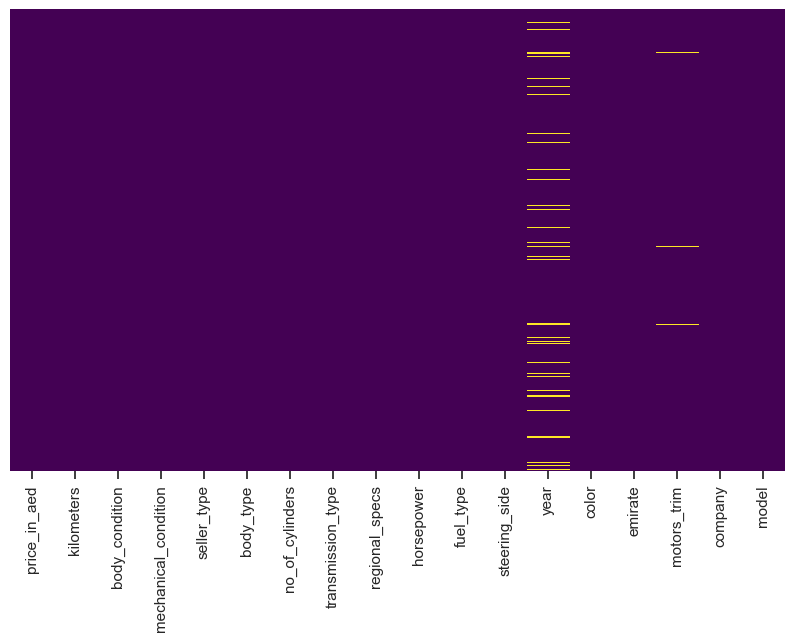

In [14]:
check_missing_values(df)

### üîé Missing Values Observations

- There are only 3 columns with missing values.
- We may fill the missing values of **no_of_cylinders** column by checking it on internet using the **year**, **company**, **model** and **motors_trim** features.
- It's the same of **motors_trim**.
- Other features might be usefull to fill the **year** value of a car also.

## Duplicates

In [15]:
df.duplicated().sum()

298

In [16]:
df = df.drop_duplicates().reset_index(drop=True)
df.shape

(9672, 18)

### üîéObservations: Duplicates

We dropped 298 data points as they had duplicated values. 

Now let's check if they impacted the number of missing values.

In [17]:
check_missing_values(df)

3 columns has missing values
--------------------------------------------------
                 Count  Percentage %
no_of_cylinders     57         0.589
year               931         9.626
motors_trim         28         0.289


‚úçüèº It reduced the number of missing values.

## Statistical Summary

In [18]:
df.describe(include='all').T

count unique                     top  freq       mean  \
price_in_aed         9672.000    NaN                     NaN   NaN 245308.815   
kilometers           9672.000    NaN                     NaN   NaN  99777.519   
body_condition           9672      4  Perfect inside and out  9333        NaN   
mechanical_condition     9672      5  Perfect inside and out  9532        NaN   
seller_type              9672      3                  Dealer  6590        NaN   
body_type                9672     13                     SUV  4429        NaN   
no_of_cylinders          9615      9                       6  3239        NaN   
transmission_type        9672      2  Automatic Transmission  9301        NaN   
regional_specs           9672      5               GCC Specs  7358        NaN   
horsepower               9672     11            200 - 300 HP  2356        NaN   
fuel_type                9672      4                Gasoline  9409        NaN   
steering_side            9672      2          Left Hand Side  9668        NaN   
year                 8741.000    NaN                     NaN   NaN   2015.607   
color                    9672     17                   White  3238        NaN   
emirate                  9672     16                   Dubai  7736        NaN   
motors_trim              9644    856                   Other  2102        NaN   
company                  9672     73           mercedes-benz  1444        NaN   
model                    9672    552                  patrol   382        NaN   

                             std      min       25%        50%        75%  \
price_in_aed          450039.961 6000.000 50000.000 102000.000 230000.000   
kilometers           1171865.307    0.000 24000.000  77000.000 134000.000   
body_condition               NaN      NaN       NaN        NaN        NaN   
mechanical_condition         NaN      NaN       NaN        NaN        NaN   
seller_type                  NaN      NaN       NaN        NaN        NaN   
body_type                    NaN      NaN       NaN        NaN        NaN   
no_of_cylinders              NaN      NaN       NaN        NaN        NaN   
transmission_type            NaN      NaN       NaN        NaN        NaN   
regional_specs               NaN      NaN       NaN        NaN        NaN   
horsepower                   NaN      NaN       NaN        NaN        NaN   
fuel_type                    NaN      NaN       NaN        NaN        NaN   
steering_side                NaN      NaN       NaN        NaN        NaN   
year                       4.740 1953.000  2014.000   2016.000   2019.000   
color                        NaN      NaN       NaN        NaN        NaN   
emirate                      NaN      NaN       NaN        NaN        NaN   
motors_trim                  NaN      NaN       NaN        NaN        NaN   
company                      NaN      NaN       NaN        NaN        NaN   
model                        NaN      NaN       NaN        NaN        NaN   

                               max  
price_in_aed          14999000.000  
kilometers           115000000.000  
body_condition                 NaN  
mechanical_condition           NaN  
seller_type                    NaN  
body_type                      NaN  
no_of_cylinders                NaN  
transmission_type              NaN  
regional_specs                 NaN  
horsepower                     NaN  
fuel_type                      NaN  
steering_side                  NaN  
year                      2021.000  
color                          NaN  
emirate                        NaN  
motors_trim                    NaN  
company                        NaN  
model                          NaN

### üîé Observations: Statistical Summary

- **price_in_aed** column has a min value of 6,000 AED and max value of 14,999,000 AED with the mean value of 245,308 AED. The mean value is mainly impacted by the max value obviously. However, only 25% of the cars are below 50,000 AED. It's hard to tell if the max value is an outlier or not.
- **kilometers** has max value of 115,000,000 km. I'm not sure how it is possible to make this amount of mileage with a car. So might be an outlier because of a typo or some other reason. It's better to check other feature of that specific Dubizzle ad such as the year, condition etc. to decide.
- Most of the cars are listed as 'Perfect inside and out' for both **body_condition** and **mechanical_condition**. As a person who lived in Dubai for 5 years and had 6 different cars within this period, I can easily say that this feature has no predictive power. 
- Most of the cars listed by a 'Dealer'. We'll check the other types in the Univeriate Analysis for Categorical Features section.
- There are 13 different **body_types** and most of the listed cars are 'SUV'.
- The most preferred cars has 6 cylinder with the number 3239 listed cars as per the dataset. 
- 'Automatic Transmission' is most preferred **transmission_type** in the region.
- The dataset has cars from 1953 till 2021 with the median value of 2016 which shows us the distribution of this column is left skewed.
- It shows 16 different Emirates in UAE however there are only 8. Which shows that there are some typos in this column.
- The most preferred **color** is 'White' which makes sense considering the climate of the region.
- It seems that the most preferred cars are Mercedes.

# üìà Data Exploration (Exploratory Data Analysis - EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

To answer the above questions, we'll perform univariate, bivariate and multivariate analysis.

# Univariate Analysis

## Numerical Features

In [19]:
nmr_feature_list

['price_in_aed', 'kilometers', 'year']

In [20]:
def dist_plot(df, feature):
    '''
        This function takes the name of the feature and
        plots the distribution of the numeric values
        both using boxplot and hisplot of seaborn.
        The purpose is to check if the numeric feature has
        normal distribution and detect outliers manualy.
        Skewness and kurtosis values of the data are also
        shown.

        Parameters
        ----------
        df: tabular data in data frame format.
        feature: string
        numeric feature (column) in the data frame.

    '''
    fig, (ax_box, ax_hist) = plt.subplots(nrows=2, sharex=True,
                                            gridspec_kw={'height_ratios':(0.15, 0.84)},
                                            figsize=(12,6))

    sb.boxplot(data=df, x=feature, color='lightblue', showmeans=True, ax=ax_box)
    ax_box.set_xlabel('')

    sb.histplot(data=df, x=feature, kde=True, ax=ax_hist)
    ax_hist.set_xlabel('')

    # Calculate skewness and kurtosis
    skewness = df[feature].skew()
    kurt = df[feature].kurt()
    # Add skewness and kurtosis as text on the histogram plot
    ax_hist.text(0.95, 0.85, f"Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}",
                    transform=ax_hist.transAxes, verticalalignment='top', horizontalalignment='right',
                    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

    # Calculate mean and the median values of the feature
    mean_value = df[feature].mean()
    median_value = df[feature].median()
    # Add these values as a vertical line to the plot
    ax_hist.axvline(mean_value, color='green', linestyle='dotted', linewidth=2, label='Mean')
    ax_hist.axvline(median_value, color='purple', linestyle='dotted', linewidth=2, label='Median')
    # Add a legend
    ax_hist.legend(loc='lower right')

    plt.title(feature)
    plt.tight_layout()
    img_path = 'Plots/' + feature + '_dist.png'
    plt.ticklabel_format(style='plain', axis='x')
    plt.savefig(img_path) # Save the plot for future use
    plt.show()

### Price in AED

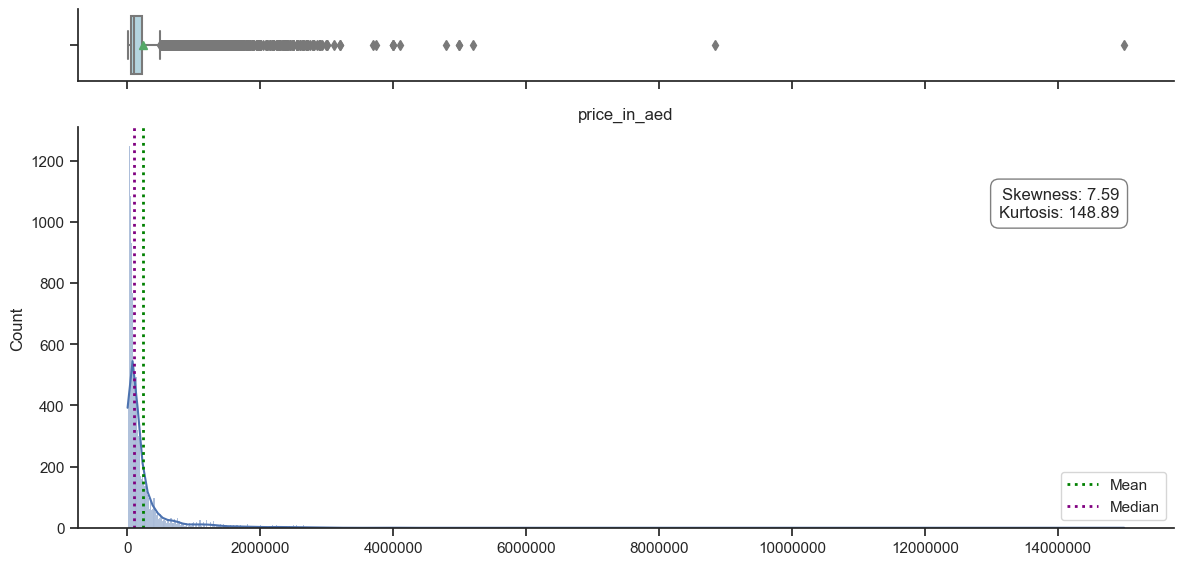

In [21]:
dist_plot(df, 'price_in_aed')

‚úçüèº The distribution of the **price_in_aed** feature is highly skewed to the right with an extreme outlier. The max value is 14,999,000 AED (more than $ 4M). Let's see if it's an outlier or just another exotic car in Dubai. Let's list down the cars with greater than or euqal to 4,000,000 AED.

In [28]:
df[df['price_in_aed'] >= 4000000]

price_in_aed  kilometers          body_condition  \
510        4999000         300  Perfect inside and out   
1082       8850000           3  Perfect inside and out   
1336       4800000          26  Perfect inside and out   
2689       5200000        1842  Perfect inside and out   
3056       4000000           0  Perfect inside and out   
4602       4000000           0  Perfect inside and out   
4954       4100000         700  Perfect inside and out   
5741      14999000        6000  Perfect inside and out   
7667       4999000           0  Perfect inside and out   

        mechanical_condition seller_type             body_type  \
510   Perfect inside and out      Dealer                 Other   
1082  Perfect inside and out      Dealer            Sports Car   
1336  Perfect inside and out      Dealer            Sports Car   
2689  Perfect inside and out      Dealer                 Coupe   
3056  Perfect inside and out      Dealer            Sports Car   
4602  Perfect inside and out      Dealer                 Coupe   
4954  Perfect inside and out      Dealer  Soft Top Convertible   
5741  Perfect inside and out      Dealer            Sports Car   
7667  Perfect inside and out      Dealer  Soft Top Convertible   

     no_of_cylinders       transmission_type  regional_specs    horsepower  \
510                8  Automatic Transmission           Other  800 - 900 HP   
1082               8  Automatic Transmission           Other  700 - 800 HP   
1336               8  Automatic Transmission       GCC Specs  700 - 800 HP   
2689               8  Automatic Transmission       GCC Specs  600 - 700 HP   
3056              12  Automatic Transmission           Other       Unknown   
4602              12  Automatic Transmission           Other  700 - 800 HP   
4954               8  Automatic Transmission  European Specs  600 - 700 HP   
5741               8  Automatic Transmission       GCC Specs       900+ HP   
7667               8  Automatic Transmission       GCC Specs  500 - 600 HP   

     fuel_type   steering_side     year   color emirate   motors_trim  \
510   Gasoline  Left Hand Side 2011.000    Blue   Dubai         Other   
1082  Gasoline  Left Hand Side 2021.000   Black   Dubai         Other   
1336  Gasoline  Left Hand Side 2019.000   White   Dubai         Other   
2689  Gasoline  Left Hand Side 2019.000   Black   Dubai         Other   
3056  Gasoline  Left Hand Side      NaN   Black   Dubai         Other   
4602  Gasoline  Left Hand Side      NaN   Black   Dubai         Other   
4954  Gasoline  Left Hand Side 2009.000  Silver   Dubai  722 Roadster   
5741    Hybrid  Left Hand Side 2014.000  Yellow   Dubai         Other   
7667  Gasoline  Left Hand Side 2009.000  Silver   Dubai  722 Roadster   

            company      model  
510         ferrari      other  
1082        mclaren       elva  
1336        mclaren      senna  
2689        mclaren      senna  
3056    lamborghini  aventador  
4602    lamborghini  aventador  
4954  mercedes-benz        slr  
5741        mclaren         p1  
7667  mercedes-benz        slr

‚úçüèº It's a McLaren P1 and we have other McLarens which are more than 4,000,000 AED. This shows that the max price in the list might be legit. 

Let's see other McLarens in the list. 

In [23]:
df[df['company'] == 'mclaren'].sort_values(by='price_in_aed', ascending=False)

price_in_aed  kilometers          body_condition  \
5741      14999000        6000  Perfect inside and out   
1082       8850000           3  Perfect inside and out   
2689       5200000        1842  Perfect inside and out   
1336       4800000          26  Perfect inside and out   
7507       2650000          34  Perfect inside and out   
2018       1800000           0  Perfect inside and out   
4229       1690000          61  Perfect inside and out   
5952       1600000        2081  Perfect inside and out   
5065       1499000          10  Perfect inside and out   
9609       1050000        7700  Perfect inside and out   
8307       1050000          11  Perfect inside and out   
8651        999000        8000  Perfect inside and out   
591         829000        8000  Perfect inside and out   
4211        819000       16207  Perfect inside and out   
1521        795000        1700  Perfect inside and out   
1622        780000        8000  Perfect inside and out   
2679        749000        2994  Perfect inside and out   
7202        749000       13800  Perfect inside and out   
2033        530000       12000  Perfect inside and out   
3935        515000        3500  Perfect inside and out   
3937        489000       22044  Perfect inside and out   
7004        435000       60546  Perfect inside and out   
2790        395000       35169  Perfect inside and out   
2549        325000       17000  Perfect inside and out   
7975        320000      105198  Perfect inside and out   
2422        305000       37766  Perfect inside and out   
7785        305000       46000  Perfect inside and out   

        mechanical_condition seller_type             body_type  \
5741  Perfect inside and out      Dealer            Sports Car   
1082  Perfect inside and out      Dealer            Sports Car   
2689  Perfect inside and out      Dealer                 Coupe   
1336  Perfect inside and out      Dealer            Sports Car   
7507  Perfect inside and out      Dealer  Hard Top Convertible   
2018  Perfect inside and out      Dealer                 Coupe   
4229  Perfect inside and out      Dealer            Sports Car   
5952  Perfect inside and out      Dealer                 Coupe   
5065  Perfect inside and out      Dealer            Sports Car   
9609  Perfect inside and out       Owner            Sports Car   
8307  Perfect inside and out      Dealer            Sports Car   
8651  Perfect inside and out      Dealer  Hard Top Convertible   
591   Perfect inside and out      Dealer                 Coupe   
4211  Perfect inside and out      Dealer                 Coupe   
1521  Perfect inside and out      Dealer            Sports Car   
1622  Perfect inside and out      Dealer            Sports Car   
2679  Perfect inside and out      Dealer            Sports Car   
7202  Perfect inside and out       Owner                 Coupe   
2033  Perfect inside and out       Owner                 Coupe   
3935  Perfect inside and out      Dealer            Sports Car   
3937  Perfect inside and out      Dealer                 Coupe   
7004  Perfect inside and out      Dealer                 Coupe   
2790  Perfect inside and out      Dealer                 Coupe   
2549  Perfect inside and out      Dealer                 Coupe   
7975  Perfect inside and out      Dealer                 Coupe   
2422  Perfect inside and out      Dealer  Hard Top Convertible   
7785  Perfect inside and out       Owner                 Coupe   

     no_of_cylinders       transmission_type        regional_specs  \
5741               8  Automatic Transmission             GCC Specs   
1082               8  Automatic Transmission                 Other   
2689               8  Automatic Transmission             GCC Specs   
1336               8  Automatic Transmission             GCC Specs   
7507               8  Automatic Transmission             GCC Specs   
2018               8  Automatic Transmission        European Specs   
4229               8  Automatic Transmissi

‚úçüèº There is a huge price gap between this one and the one that is closest to this pricewise. Even though the mileage is lower and it's younger. However, as per the internet search, 2014-2015 McLaren P1 is the 10th most expensive car sold among other McLarens so **this value is not a typo or value error**.

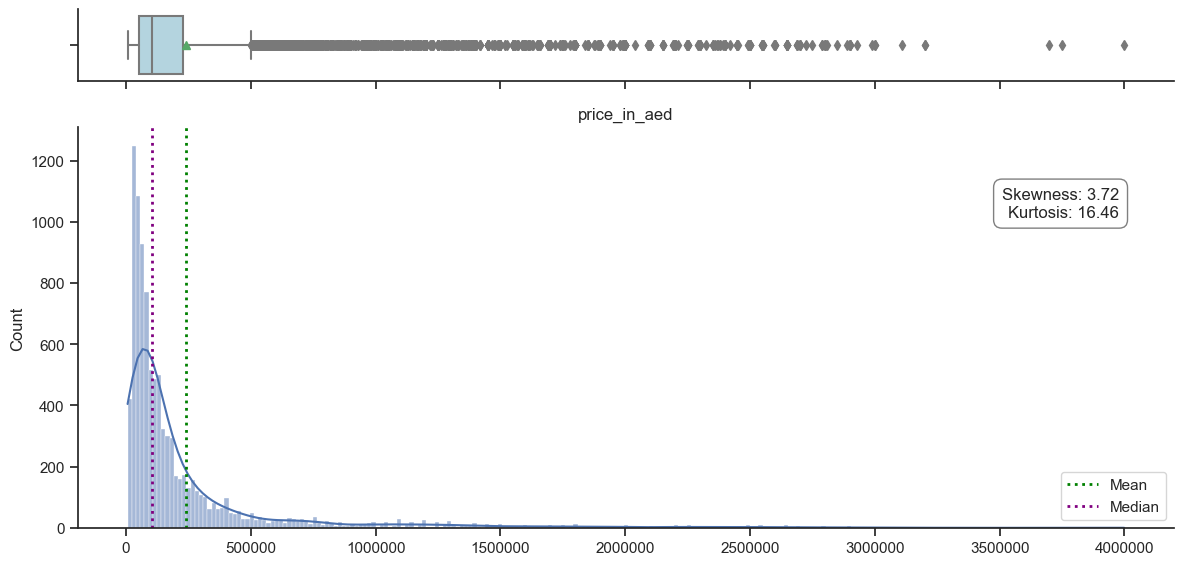

In [24]:
dist_plot(df[df['price_in_aed'] < 4000000], 'price_in_aed')

### üîé Observations: Price in AED

- The distribution of the data is highly right skewed as UAE, especially Duabi, is famous with the luxury cars.

### Kilometers (mileage)

In [25]:
dist_plot(df, 'kilometers')

In [26]:
df[df['kilometers'] == 115000000]

price_in_aed  kilometers          body_condition  \
1348        112000   115000000  Perfect inside and out   

        mechanical_condition seller_type body_type no_of_cylinders  \
1348  Perfect inside and out       Owner       SUV               8   

           transmission_type regional_specs    horsepower fuel_type  \
1348  Automatic Transmission      GCC Specs  400 - 500 HP  Gasoline   

       steering_side     year color emirate motors_trim company         model  
1348  Left Hand Side 2006.000  Gold   Dubai        Base  toyota  land-cruiser

‚úçüèº The max number of **kilometers** is 115,000,000 km which a little unrealistic especially for a car which was manufactured in 2006. The price of this car is also an indicator of a wrong data entry. Let's check:
1. If there are any cars above 2,000,000 km
2. What are the average mileage of Toyota Land-Cruiser which are around 15 years (2021 - 2006).


In [27]:
# Checking the cars with 2,000,000 and above
df[df['kilometers'] >= 2000000]['kilometers']

1157      2500000
1348    115000000
1581      2015652
2028      2000000
2975      2559000
Name: kilometers, dtype: int64

In [28]:
# Check the mean value of kilometers for Toyota Land-Cruiser which are older than 14 year 
# by dropping the outlier not to impact the mean.
df[(df['company'] == 'toyota') & (df['model'] == 'land-cruiser') & 
   (df['year'] <= 2007)].drop(index=1348)['kilometers'].mean()

315213.0

In [29]:
index = df[df['kilometers'] == 115000000].index
df.loc[index, 'kilometers'] = 316000

In [30]:
dist_plot(df, 'kilometers')

### üîé Observations: Kilometers

- The data is right skewed.
- There are some outliers worth to examine.

### Production Year

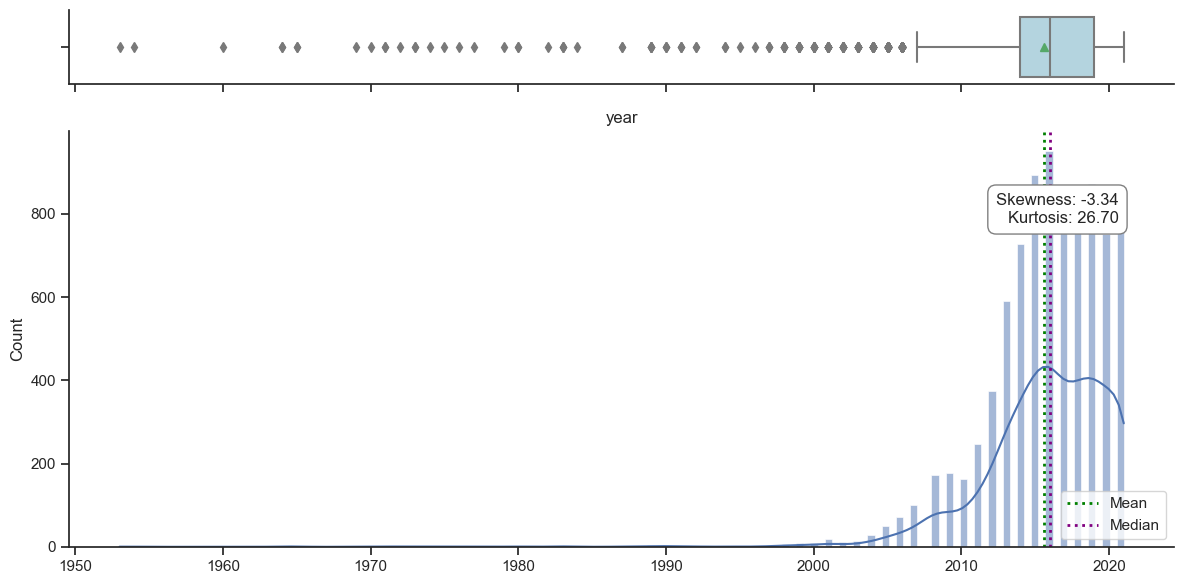

In [31]:
dist_plot(df, 'year')

In [32]:
df[df['year'] == 1953]

price_in_aed  kilometers          body_condition  \
4291         95000        1600  Perfect inside and out   

        mechanical_condition seller_type      body_type no_of_cylinders  \
4291  Perfect inside and out       Owner  Pick Up Truck               8   

           transmission_type        regional_specs    horsepower fuel_type  \
4291  Automatic Transmission  North American Specs  200 - 300 HP  Gasoline   

       steering_side     year   color emirate motors_trim company   model  
4291  Left Hand Side 1953.000  Silver   Dubai       Other     gmc  sierra

### üîé Observations: Year

- As we guessed earlier the distribution of this feature is left skewed.
- The min value which is 1953 obviously is not an outlier. It has some other old cars which can be classified as old timer and yound timers and can be considered as classics. It is a worth to examine this feature along with the price in Bivariate Analysis section.

## Categorical Features

In [33]:
cat_feature_list

['body_condition',
 'mechanical_condition',
 'seller_type',
 'body_type',
 'no_of_cylinders',
 'transmission_type',
 'regional_specs',
 'horsepower',
 'fuel_type',
 'steering_side',
 'color',
 'emirate',
 'motors_trim',
 'company',
 'model']

In [34]:
# Function to create labeled barplots

def plot_counts(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])            # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 12)
    ax = sb.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )                              # Percentage of each class of the category
        else:
            label = p.get_height()         # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()                 # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )                                 # Annotate the percentage

    img_path = 'Plots/' + feature + '_dist.png'
    plt.savefig(img_path) # Save the plot for future use
    plt.show()

### Body Condition

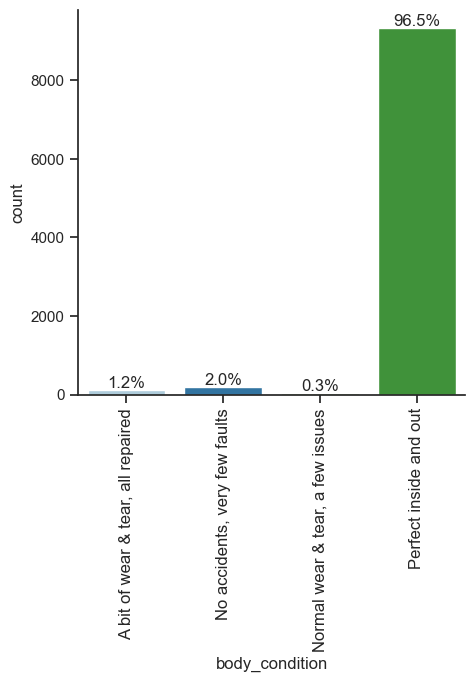

In [35]:
plot_counts(df, 'body_condition', perc=True)

### Mechanical Condition

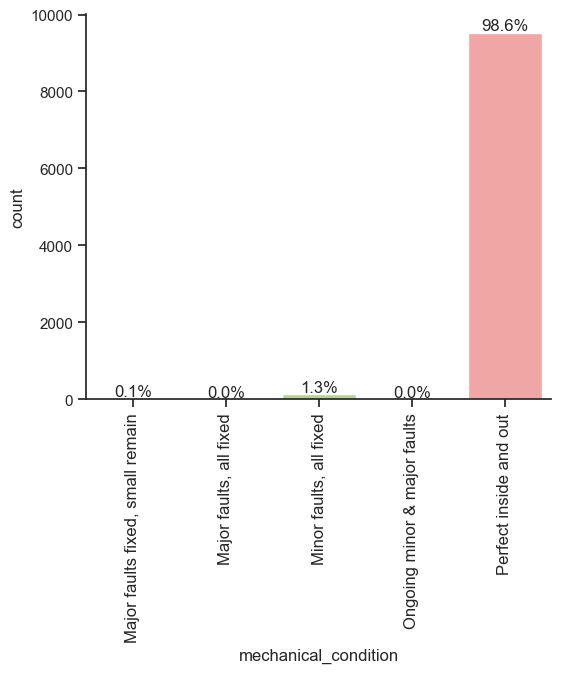

In [36]:
plot_counts(df, 'mechanical_condition', perc=True)

### üîé Observations: Mechanical Condition

### Seller Type

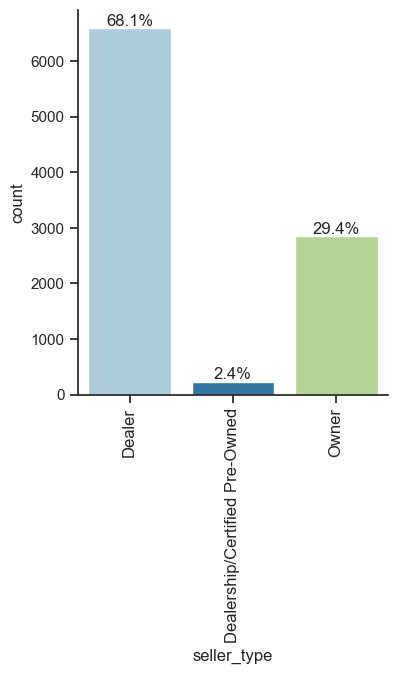

In [37]:
plot_counts(df, 'seller_type', perc=True)

### üîé Observations: Seller Type

- There 3 different seller types.
- Most of the ads are from dealers.
- Second is the owner from the car.
- Thrid is from the original dealer buys the car from the owner and does the inspection, fix the issues if any and sells it to someone else by listing it on Dubizzle platform.
- It's worth to inspect if this feature has an impact on the price.

### Body Type

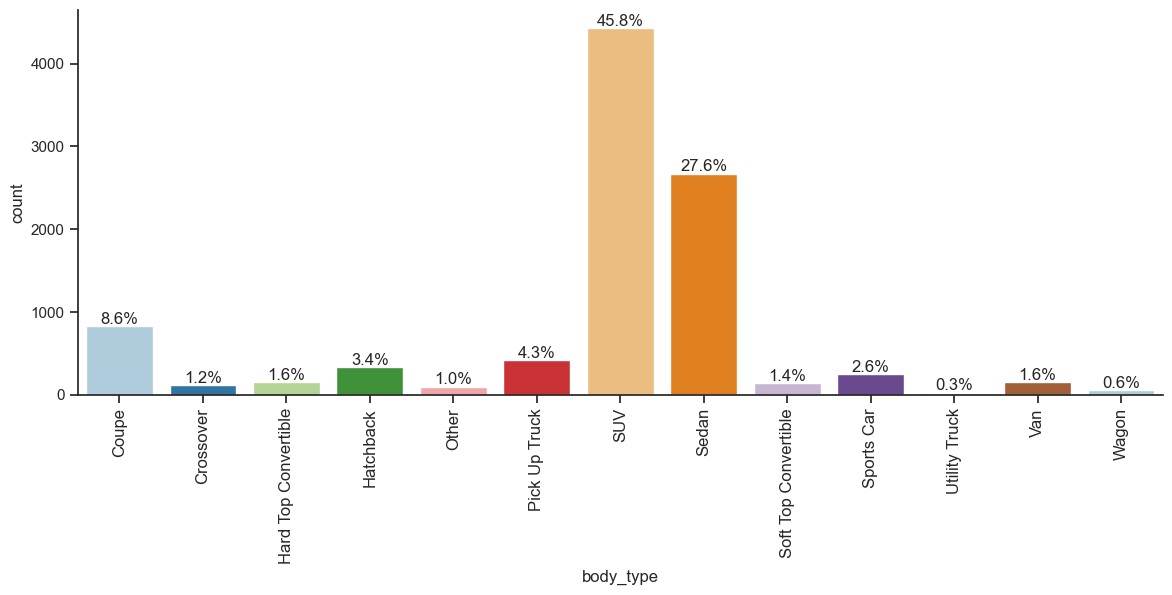

In [38]:
plot_counts(df, 'body_type', perc=True)

### üîé Observations: Body Type

- The total percentage of convertible cars is only 3. This makes sense considerin the climate of the region.
- The most preferred **body_type** is 'SUV' in the region.

### Number of Cylinders

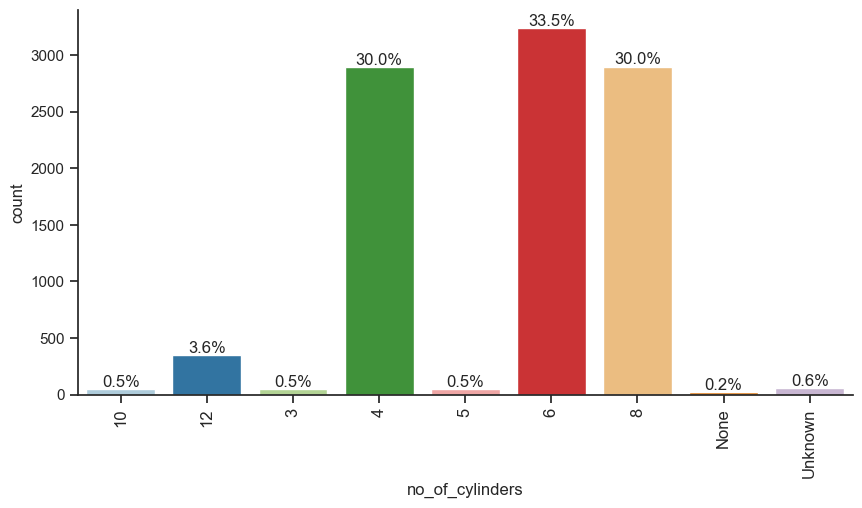

In [39]:
plot_counts(df, 'no_of_cylinders', perc=True)

In [40]:
df[(df['no_of_cylinders'] == 'None')]

price_in_aed  kilometers          body_condition  \
164         120000           0  Perfect inside and out   
1320         23000        2000  Perfect inside and out   
2153        118000           0  Perfect inside and out   
2654         65000           0  Perfect inside and out   
2743        205000       78107  Perfect inside and out   
3418         29500       77000  Perfect inside and out   
3440        175000           0  Perfect inside and out   
3743        205000       82722  Perfect inside and out   
3805        799000        2900  Perfect inside and out   
3856        399000       26158  Perfect inside and out   
4241        240000       43260  Perfect inside and out   
4324        240000        9632  Perfect inside and out   
4357        800000        7800  Perfect inside and out   
4951        120999           7  Perfect inside and out   
5564         80000           0  Perfect inside and out   
5643        229000       31933  Perfect inside and out   
6752        126615           0  Perfect inside and out   
7045        210000       58285  Perfect inside and out   
7276        295000       43000  Perfect inside and out   
7472        230000       10000  Perfect inside and out   
8241        125000      220000  Perfect inside and out   
8413        250000       51000  Perfect inside and out   

        mechanical_condition seller_type      body_type no_of_cylinders  \
164   Perfect inside and out      Dealer      Hatchback            None   
1320  Perfect inside and out      Dealer          Other            None   
2153  Perfect inside and out      Dealer      Crossover            None   
2654  Perfect inside and out      Dealer          Other            None   
2743  Perfect inside and out      Dealer          Sedan            None   
3418  Perfect inside and out       Owner      Hatchback            None   
3440  Perfect inside and out      Dealer      Crossover            None   
3743  Perfect inside and out      Dealer          Sedan            None   
3805  Perfect inside and out       Owner     Sports Car            None   
3856  Perfect inside and out      Dealer            SUV            None   
4241  Perfect inside and out      Dealer          Sedan            None   
4324  Perfect inside and out      Dealer          Sedan            None   
4357  Perfect inside and out       Owner          Sedan            None   
4951  Perfect inside and out      Dealer            SUV            None   
5564  Perfect inside and out       Owner  Pick Up Truck            None   
5643  Perfect inside and out      Dealer          Sedan            None   
6752  Perfect inside and out      Dealer      Crossover            None   
7045  Perfect inside and out      Dealer          Sedan            None   
7276  Perfect inside and out      Dealer            SUV            None   
7472  Perfect inside and out      Dealer          Sedan            None   
8241  Perfect inside and out      Dealer          Other            None   
8413  Perfect inside and out      Dealer          Other            None   

           transmission_type  regional_specs        horsepower fuel_type  \
164   Automatic Transmission       GCC Specs  Less than 150 HP  Electric   
1320  Automatic Transmission  Japanese Specs  Less than 150 HP  Electric   
2153  Automatic Transmission           Other           Unknown  Electric   
2654  Automatic Transmission  European Specs           Unknown  Gasoline   
2743  Automatic Transmission       GCC Specs      400 - 500 HP  Electric   
3418  Automatic Transmission       GCC Specs           Unknown  Gasoline   
3440  Automatic Transmission           Other           Unknown  Gasoline   
3743  Automatic Transmission       GCC Specs      400 - 500 HP  Electric   
3805  Automatic Transmission       GCC Specs      700 - 800 HP  Electric   
3856  Automatic Transmission       GCC Specs      500 - 600 HP  Electric   
4241  Automatic Transmission       GCC Specs      300 - 400 HP  Electric   
4324  Automatic Transmission     

‚úçüèº
- Electric car doesn't have cylinders by nature. So it makes sense to have None value in the **no_of_cylinders** feature for electric cars.
- volkswagen id6 is an electric car however it's listed as Gasoline **fuel_type**. Also it has 302 horse power. We should fix this info.
- tesla model-3 is also electric car. 
- porsche taycan is an electrci car too.

Let's fix these issue in the dataset.

In [41]:
df.loc[3440, 'fuel_type'] = 'Electric'
df.loc[3440, 'horsepower'] = '300 - 400 HP'
df.loc[4357, 'fuel_type'] = 'Electric'
df.loc[5643, 'fuel_type'] = 'Electric'

‚úçüèº Another check

In [42]:
df[(df['no_of_cylinders'] == 'None') & (df['fuel_type'] != 'Electric')]

price_in_aed  kilometers          body_condition  \
2654         65000           0  Perfect inside and out   
3418         29500       77000  Perfect inside and out   
5564         80000           0  Perfect inside and out   
8241        125000      220000  Perfect inside and out   
8413        250000       51000  Perfect inside and out   

        mechanical_condition seller_type      body_type no_of_cylinders  \
2654  Perfect inside and out      Dealer          Other            None   
3418  Perfect inside and out       Owner      Hatchback            None   
5564  Perfect inside and out       Owner  Pick Up Truck            None   
8241  Perfect inside and out      Dealer          Other            None   
8413  Perfect inside and out      Dealer          Other            None   

           transmission_type  regional_specs horsepower fuel_type  \
2654  Automatic Transmission  European Specs    Unknown  Gasoline   
3418  Automatic Transmission       GCC Specs    Unknown  Gasoline   
5564  Automatic Transmission       GCC Specs    Unknown    Diesel   
8241     Manual Transmission           Other    900+ HP  Gasoline   
8413  Automatic Transmission           Other    Unknown  Gasoline   

       steering_side     year  color     emirate   motors_trim     company  \
2654  Left Hand Side 2017.000  Black     Sharjah         Other       honda   
3418  Left Hand Side 2017.000  Black   Abu Dhabi      Standard     renault   
5564  Left Hand Side      NaN  White       Dubai         Other  mitsubishi   
8241  Left Hand Side 2015.000  White     Sharjah  Super Safari      nissan   
8413  Left Hand Side 2019.000    Red     Sharjah         Other        ford   

       model  
2654    cr-v  
3418  duster  
5564    l200  
8241  patrol  
8413   other

‚úçüèº 
- 2017 Honda CR-V also has only 4 cylinder options in UAE with 184 HP.
- 2017 Renault Duster with Standard **motors_trim** has 4 cylinders with 135 HP.
- Since the **kilometers** value of Mitsubishi l200 0 we'll assume that the year is 2021. It should have 4 cylinders along with 136 HP with automatic transmission.
- 2015 Nissan Patrol Super Safari has 6 cyclinders. However, dataset shows that it has 900+ HP which is not the original value. Originally this car has 280 HP. Either this car is modified in a way or it's a typo. The average price might be an indicator for this.
- The last one has no valuable further information so it should be dropped.

In [43]:
# Check the available options for horsepower 
df['horsepower'].value_counts()

200 - 300 HP        2356
300 - 400 HP        2150
400 - 500 HP        1242
150 - 200 HP        1182
500 - 600 HP         995
Unknown              787
Less than 150 HP     385
600 - 700 HP         379
700 - 800 HP         149
800 - 900 HP          29
900+ HP               18
Name: horsepower, dtype: int64

In [44]:
df.loc[2654, 'no_of_cylinders'] = 4
df.loc[2654, 'horsepower'] = '150 - 200 HP'
df.loc[3418, 'no_of_cylinders'] = 4
df.loc[3418, 'horsepower'] = '150 - 200 HP'
df.loc[5564, 'no_of_cylinders'] = 4
df.loc[5564, 'horsepower'] = '150 - 200 HP'

In [45]:
df.drop(index=8413, inplace=True) # drop Ford with other model
df = df.reset_index(drop=True)

In [46]:
df[df['motors_trim'] == 'Super Safari']

price_in_aed  kilometers          body_condition  \
35          125000       94000  Perfect inside and out   
810         167900        4500  Perfect inside and out   
867         135000      137000  Perfect inside and out   
960         155000       10000  Perfect inside and out   
1235         90000      140000  Perfect inside and out   
1420        127000      110000  Perfect inside and out   
1629        133000      130000  Perfect inside and out   
2012        109000       57000  Perfect inside and out   
2355        169000           0  Perfect inside and out   
2455        150000       22000  Perfect inside and out   
2587         80000      132000  Perfect inside and out   
2688        125000       66072  Perfect inside and out   
2702        120000       59164  Perfect inside and out   
2793        115000      100000  Perfect inside and out   
2847        117000      142000  Perfect inside and out   
3040        135000        4700  Perfect inside and out   
3561        169000           0  Perfect inside and out   
3973        161000           0  Perfect inside and out   
4007        126000      100000  Perfect inside and out   
4034         98000      160000  Perfect inside and out   
4076        158995       71000  Perfect inside and out   
4326        137000       59000  Perfect inside and out   
4363        169500       47759  Perfect inside and out   
4822        160000        7000  Perfect inside and out   
5793        179000           0  Perfect inside and out   
5920        175000        6500  Perfect inside and out   
6147         69000      120568  Perfect inside and out   
6441         20000      399000  Perfect inside and out   
6604        147000       75000  Perfect inside and out   
6990        202000           0  Perfect inside and out   
7024        179000           0  Perfect inside and out   
7103        134000      111000  Perfect inside and out   
7383        130000       80000  Perfect inside and out   
7656        162000        8000  Perfect inside and out   
7703        178000       15000  Perfect inside and out   
7976        115000      105000  Perfect inside and out   
8241        125000      220000  Perfect inside and out   
8863        135000       25262  Perfect inside and out   
8905        205000          17  Perfect inside and out   
9048         55000      260000  Perfect inside and out   
9273        133000       71000  Perfect inside and out   
9318        162000       48000  Perfect inside and out   
9361        109000       34641  Perfect inside and out   
9377        179000           0  Perfect inside and out   
9394        179000           0  Perfect inside and out   
9472        155000       13000  Perfect inside and out   
9654        157000       19780  Perfect inside and out   

        mechanical_condition                     seller_type body_type  \
35    Perfect inside and out                          Dealer       SUV   
810   Perfect inside and out                           Owner       SUV   
867   Perfect inside and out                          Dealer       SUV   
960   Perfect inside and out                          Dealer       SUV   
1235  Perfect inside and out                           Owner       SUV   
1420  Perfect inside and out                          Dealer       SUV   
1629  Perfect inside and out                          Dealer       SUV   
2012  Perfect inside and out                           Owner       SUV   
2355  Perfect inside and out                          Dealer       SUV   
2455  Perfect inside and out                          Dealer       SUV   
2587  Perfect inside and out                           Owner       SUV   
2688  Perfect inside and out                          Dealer       SUV   
2702  Perfect inside and out                          Dealer       SUV   
2793  Perfect inside and out                           Owner       SUV   
2847  Perfect inside and out                          Dealer       SUV   
3040  Perfect inside and out         

‚úçüèº As per the search over the internet Super Safari **motors_trim** of Nissan Patrol has 200 - 300 HP if it has 6 cylinders, and it has 300 - 400 HP if it has 8 cylinders.
The one with the None **no_of_cylinders** value will be se to 6 as it's the value for the majority.

In [47]:
df.loc[(df['horsepower'] == 'Unknown') & (df['no_of_cylinders'] == 6), 'horsepower'] = '200 - 300 HP'

In [48]:
df.loc[8241, 'no_of_cylinders'] = 6
df.loc[8241, 'no_of_cylinders'] = '200 - 300 HP'

‚úçüèº Now it's time to check **no_of_cylinder** with 'Unknown' value. As we mentioned earlier, we should set this feature to 'None' to the cars with 'Electric' **fuel_type**.

In [49]:
df.loc[(df['no_of_cylinders'] == 'Unknown') & (df['fuel_type'] == 'Electric'), 'no_of_cylinders'] = 'None'

In [50]:
df[(df['no_of_cylinders'] == 'Unknown') & (df['fuel_type'] == 'Electric')]

Empty DataFrame
Columns: [price_in_aed, kilometers, body_condition, mechanical_condition, seller_type, body_type, no_of_cylinders, transmission_type, regional_specs, horsepower, fuel_type, steering_side, year, color, emirate, motors_trim, company, model]
Index: []

In [51]:
len(df[(df['no_of_cylinders'] == 'Unknown')])

47

In [52]:
df[(df['no_of_cylinders'] == 'Unknown')]

price_in_aed  kilometers                      body_condition  \
204          25000      220000              Perfect inside and out   
437          77000       87000              Perfect inside and out   
658          34000       52000              Perfect inside and out   
667          57000       58734              Perfect inside and out   
692          63000           0              Perfect inside and out   
881          40000       81000              Perfect inside and out   
924          39000       53000              Perfect inside and out   
1048        199000        1100              Perfect inside and out   
1160       1400000           0              Perfect inside and out   
1202        990000         550              Perfect inside and out   
1322         78000       50500              Perfect inside and out   
2111       1450000           0              Perfect inside and out   
2286        170000       34000              Perfect inside and out   
2707         64800        8500              Perfect inside and out   
2812         56000           0              Perfect inside and out   
3106        380000       69000       No accidents, very few faults   
3191       1200000           0              Perfect inside and out   
3394        480000           0              Perfect inside and out   
3529        739000       12000              Perfect inside and out   
3585         45000       55300              Perfect inside and out   
4268         27000       83000              Perfect inside and out   
4599         33500           0              Perfect inside and out   
5038         26000           0              Perfect inside and out   
5321        670000           0              Perfect inside and out   
5400        149000           0              Perfect inside and out   
5531         24000      270000              Perfect inside and out   
5765         79000      126000              Perfect inside and out   
5846        310000           0              Perfect inside and out   
6640        270000       80000              Perfect inside and out   
6881        130000           0              Perfect inside and out   
6893         15000      303000              Perfect inside and out   
6952        749000        5551              Perfect inside and out   
7115         66000           0              Perfect inside and out   
7187        247000       15000              Perfect inside and out   
7189        115000       58500              Perfect inside and out   
7224         15000      170000       No accidents, very few faults   
7261         89500           0              Perfect inside and out   
7286         22000      180000              Perfect inside and out   
7503        825000       11080              Perfect inside and out   
7523       1700000           0              Perfect inside and out   
7529         69000       70000              Perfect inside and out   
7566        150000       32000              Perfect inside and out   
7949         59900       44000              Perfect inside and out   
8681        196000           0              Perfect inside and out   
8728        100000       66000  A bit of wear & tear, all repaired   
9192        380000       69000       No accidents, very few faults   
9436         80000           0              Perfect inside and out   

         mechanical_condition                     seller_type  \
204    Perfect inside and out                           Owner   
437    Perfect inside and out                          Dealer   
658    Perfect inside and out                          Dealer   
667    Perfect inside and out                           Owner   
692    Perfect inside and out                          Dealer   
881    Perfect inside and out                           Owner   
924    Perfect inside and out                          Dealer   
1048   Perfect inside and out  Dealership/Certified Pre-Owned   
1160   Perfect inside and out                          Deale

In [53]:
# Updating the fuel_type and no_of_cylinders for all Tesla cars
df.loc[(df['company'] == 'tesla') & (df['fuel_type'] != 'Electric'), ['fuel_type', 'no_of_cylinders']] = ['Electric', 'None']

In [54]:
# Updating the fuel_type and no_of_cylinders for all Porsche Taycan cars
df.loc[(df['model'] == 'taycan') & (df['fuel_type'] != 'Electric'), ['fuel_type', 'no_of_cylinders']] = ['Electric', 'None']

In [55]:
df[(df['no_of_cylinders'] == 'Unknown')]

price_in_aed  kilometers                      body_condition  \
204          25000      220000              Perfect inside and out   
437          77000       87000              Perfect inside and out   
658          34000       52000              Perfect inside and out   
667          57000       58734              Perfect inside and out   
692          63000           0              Perfect inside and out   
881          40000       81000              Perfect inside and out   
924          39000       53000              Perfect inside and out   
1048        199000        1100              Perfect inside and out   
1160       1400000           0              Perfect inside and out   
1202        990000         550              Perfect inside and out   
1322         78000       50500              Perfect inside and out   
2111       1450000           0              Perfect inside and out   
2286        170000       34000              Perfect inside and out   
2707         64800        8500              Perfect inside and out   
2812         56000           0              Perfect inside and out   
3106        380000       69000       No accidents, very few faults   
3191       1200000           0              Perfect inside and out   
3394        480000           0              Perfect inside and out   
3585         45000       55300              Perfect inside and out   
4268         27000       83000              Perfect inside and out   
4599         33500           0              Perfect inside and out   
5038         26000           0              Perfect inside and out   
5321        670000           0              Perfect inside and out   
5400        149000           0              Perfect inside and out   
5531         24000      270000              Perfect inside and out   
5765         79000      126000              Perfect inside and out   
5846        310000           0              Perfect inside and out   
6640        270000       80000              Perfect inside and out   
6881        130000           0              Perfect inside and out   
6893         15000      303000              Perfect inside and out   
7115         66000           0              Perfect inside and out   
7189        115000       58500              Perfect inside and out   
7224         15000      170000       No accidents, very few faults   
7261         89500           0              Perfect inside and out   
7286         22000      180000              Perfect inside and out   
7523       1700000           0              Perfect inside and out   
7529         69000       70000              Perfect inside and out   
7566        150000       32000              Perfect inside and out   
7949         59900       44000              Perfect inside and out   
8681        196000           0              Perfect inside and out   
8728        100000       66000  A bit of wear & tear, all repaired   
9192        380000       69000       No accidents, very few faults   
9436         80000           0              Perfect inside and out   

         mechanical_condition                     seller_type  \
204    Perfect inside and out                           Owner   
437    Perfect inside and out                          Dealer   
658    Perfect inside and out                          Dealer   
667    Perfect inside and out                           Owner   
692    Perfect inside and out                          Dealer   
881    Perfect inside and out                           Owner   
924    Perfect inside and out                          Dealer   
1048   Perfect inside and out  Dealership/Certified Pre-Owned   
1160   Perfect inside and out                          Dealer   
1202   Perfect inside and out                           Owner   
1322   Perfect inside and out                           Owner   
2111   Perfect inside and out                          Dealer   
2286   Perfect inside and out                           Owner   
2707   Perfect 

In [56]:
# Updating the fuel_type and no_of_cylinders for all Volkswagen ID4 cars
df.loc[(df['model'] == 'id4') & (df['fuel_type'] != 'Electric'), ['fuel_type', 'no_of_cylinders']] = ['Electric', 'None']

In [57]:
df.loc[(df['model'] == 'id4')]

price_in_aed  kilometers          body_condition  \
466         115000           0  Perfect inside and out   
1294        112000           0  Perfect inside and out   
2573        112000           0  Perfect inside and out   
2754        145999           7  Perfect inside and out   
3065        125000           0  Perfect inside and out   
3530        130000           0  Perfect inside and out   
3547        128000          50  Perfect inside and out   
3821        125000           0  Perfect inside and out   
4511        114000           0  Perfect inside and out   
4877        112000           0  Perfect inside and out   
5128        125000           0  Perfect inside and out   
5265        130000           0  Perfect inside and out   
5400        149000           0  Perfect inside and out   
7001        114000          13  Perfect inside and out   
7226        111000           0  Perfect inside and out   
8224        112000           0  Perfect inside and out   
8619        112000           0  Perfect inside and out   
9030        139000          41  Perfect inside and out   

        mechanical_condition seller_type  body_type no_of_cylinders  \
466   Perfect inside and out      Dealer  Crossover             NaN   
1294  Perfect inside and out      Dealer  Crossover             NaN   
2573  Perfect inside and out      Dealer  Crossover             NaN   
2754  Perfect inside and out      Dealer        SUV             NaN   
3065  Perfect inside and out      Dealer  Hatchback             NaN   
3530  Perfect inside and out      Dealer      Wagon             NaN   
3547  Perfect inside and out      Dealer  Crossover             NaN   
3821  Perfect inside and out      Dealer  Crossover             NaN   
4511  Perfect inside and out      Dealer        SUV             NaN   
4877  Perfect inside and out      Dealer        SUV             NaN   
5128  Perfect inside and out      Dealer  Crossover             NaN   
5265  Perfect inside and out      Dealer        SUV             NaN   
5400  Perfect inside and out      Dealer  Crossover            None   
7001  Perfect inside and out      Dealer        SUV             NaN   
7226  Perfect inside and out      Dealer  Crossover             NaN   
8224  Perfect inside and out      Dealer  Crossover             NaN   
8619  Perfect inside and out      Dealer        SUV             NaN   
9030  Perfect inside and out      Dealer  Crossover             NaN   

           transmission_type  regional_specs    horsepower fuel_type  \
466   Automatic Transmission           Other       Unknown  Electric   
1294  Automatic Transmission       GCC Specs  200 - 300 HP  Electric   
2573  Automatic Transmission           Other  200 - 300 HP  Electric   
2754  Automatic Transmission           Other       Unknown  Electric   
3065  Automatic Transmission           Other  150 - 200 HP  Electric   
3530  Automatic Transmission  European Specs  400 - 500 HP  Electric   
3547  Automatic Transmission           Other  150 - 200 HP  Electric   
3821  Automatic Transmission           Other       Unknown  Electric   
4511  Automatic Transmission           Other  200 - 300 HP  Electric   
4877  Automatic Transmission       GCC Specs  200 - 300 HP  Electric   
5128  Automatic Transmission           Other       Unknown  Electric   
5265  Automatic Transmission       GCC Specs  150 - 200 HP  Electric   
5400  Automatic Transmission  European Specs       Unknown  Electric   
7001  Automatic Transmission           Other  150 - 200 HP  Electric   
7226  Automatic Transmission       GCC Specs  200 - 300 HP  Electric   
8224  Automatic Transmission       GCC Specs  200 - 300 HP  Electric   
8619  Automatic Transmission       GCC Specs  200 - 300 HP  Electric   
9030  Automatic Transmission           Other  200 - 300 HP  Electric   

       steering_side     year  color     emirate motors_trim     company model  
466   Left Hand Side      NaN   Grey       Dubai       Crozz  volkswagen   id4  
1294  Left Hand Side 2

‚úçüèº As per the internet research the **body_type** of this car is 'Crossover' and  **no_of_cylinders** is 'None' as it's an Electric car.

In [58]:
# Updating the fuel_type and body_type for all Volkswagen ID4 cars
df.loc[(df['model'] == 'id4'), ['body_type', 'no_of_cylinders']] = ['Crossover', 'None']

‚úçüèº Let's see how it changed the distribution of **body_types**

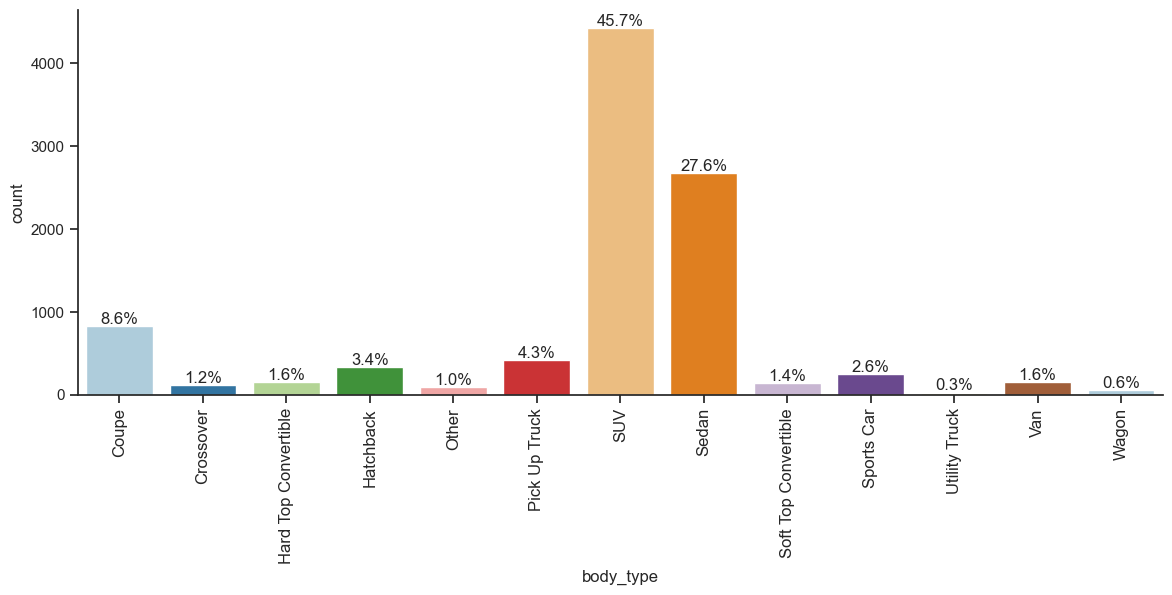

In [59]:
plot_counts(df, 'body_type', perc=True)

‚úçüèº It seems it reduced the number of SUVs only 0.1%. 

In [60]:
df.loc[(df['model'] == 'id4')]

price_in_aed  kilometers          body_condition  \
466         115000           0  Perfect inside and out   
1294        112000           0  Perfect inside and out   
2573        112000           0  Perfect inside and out   
2754        145999           7  Perfect inside and out   
3065        125000           0  Perfect inside and out   
3530        130000           0  Perfect inside and out   
3547        128000          50  Perfect inside and out   
3821        125000           0  Perfect inside and out   
4511        114000           0  Perfect inside and out   
4877        112000           0  Perfect inside and out   
5128        125000           0  Perfect inside and out   
5265        130000           0  Perfect inside and out   
5400        149000           0  Perfect inside and out   
7001        114000          13  Perfect inside and out   
7226        111000           0  Perfect inside and out   
8224        112000           0  Perfect inside and out   
8619        112000           0  Perfect inside and out   
9030        139000          41  Perfect inside and out   

        mechanical_condition seller_type  body_type no_of_cylinders  \
466   Perfect inside and out      Dealer  Crossover            None   
1294  Perfect inside and out      Dealer  Crossover            None   
2573  Perfect inside and out      Dealer  Crossover            None   
2754  Perfect inside and out      Dealer  Crossover            None   
3065  Perfect inside and out      Dealer  Crossover            None   
3530  Perfect inside and out      Dealer  Crossover            None   
3547  Perfect inside and out      Dealer  Crossover            None   
3821  Perfect inside and out      Dealer  Crossover            None   
4511  Perfect inside and out      Dealer  Crossover            None   
4877  Perfect inside and out      Dealer  Crossover            None   
5128  Perfect inside and out      Dealer  Crossover            None   
5265  Perfect inside and out      Dealer  Crossover            None   
5400  Perfect inside and out      Dealer  Crossover            None   
7001  Perfect inside and out      Dealer  Crossover            None   
7226  Perfect inside and out      Dealer  Crossover            None   
8224  Perfect inside and out      Dealer  Crossover            None   
8619  Perfect inside and out      Dealer  Crossover            None   
9030  Perfect inside and out      Dealer  Crossover            None   

           transmission_type  regional_specs    horsepower fuel_type  \
466   Automatic Transmission           Other       Unknown  Electric   
1294  Automatic Transmission       GCC Specs  200 - 300 HP  Electric   
2573  Automatic Transmission           Other  200 - 300 HP  Electric   
2754  Automatic Transmission           Other       Unknown  Electric   
3065  Automatic Transmission           Other  150 - 200 HP  Electric   
3530  Automatic Transmission  European Specs  400 - 500 HP  Electric   
3547  Automatic Transmission           Other  150 - 200 HP  Electric   
3821  Automatic Transmission           Other       Unknown  Electric   
4511  Automatic Transmission           Other  200 - 300 HP  Electric   
4877  Automatic Transmission       GCC Specs  200 - 300 HP  Electric   
5128  Automatic Transmission           Other       Unknown  Electric   
5265  Automatic Transmission       GCC Specs  150 - 200 HP  Electric   
5400  Automatic Transmission  European Specs       Unknown  Electric   
7001  Automatic Transmission           Other  150 - 200 HP  Electric   
7226  Automatic Transmission       GCC Specs  200 - 300 HP  Electric   
8224  Automatic Transmission       GCC Specs  200 - 300 HP  Electric   
8619  Automatic Transmission       GCC Specs  200 - 300 HP  Electric   
9030  Automatic Transmission           Other  200 - 300 HP  Electric   

       steering_side     year  color     emirate motors_trim     company model  
466   Left Hand Side      NaN   Grey       Dubai       Crozz  volkswagen   id4  
1294  Left Hand Side 2

In [61]:
df[(df['no_of_cylinders'] == 'Unknown')]

price_in_aed  kilometers                      body_condition  \
204          25000      220000              Perfect inside and out   
437          77000       87000              Perfect inside and out   
658          34000       52000              Perfect inside and out   
667          57000       58734              Perfect inside and out   
692          63000           0              Perfect inside and out   
881          40000       81000              Perfect inside and out   
924          39000       53000              Perfect inside and out   
1048        199000        1100              Perfect inside and out   
1160       1400000           0              Perfect inside and out   
1202        990000         550              Perfect inside and out   
1322         78000       50500              Perfect inside and out   
2111       1450000           0              Perfect inside and out   
2286        170000       34000              Perfect inside and out   
2707         64800        8500              Perfect inside and out   
2812         56000           0              Perfect inside and out   
3106        380000       69000       No accidents, very few faults   
3191       1200000           0              Perfect inside and out   
3394        480000           0              Perfect inside and out   
3585         45000       55300              Perfect inside and out   
4268         27000       83000              Perfect inside and out   
4599         33500           0              Perfect inside and out   
5038         26000           0              Perfect inside and out   
5321        670000           0              Perfect inside and out   
5531         24000      270000              Perfect inside and out   
5765         79000      126000              Perfect inside and out   
5846        310000           0              Perfect inside and out   
6640        270000       80000              Perfect inside and out   
6881        130000           0              Perfect inside and out   
6893         15000      303000              Perfect inside and out   
7115         66000           0              Perfect inside and out   
7189        115000       58500              Perfect inside and out   
7224         15000      170000       No accidents, very few faults   
7261         89500           0              Perfect inside and out   
7286         22000      180000              Perfect inside and out   
7523       1700000           0              Perfect inside and out   
7529         69000       70000              Perfect inside and out   
7566        150000       32000              Perfect inside and out   
7949         59900       44000              Perfect inside and out   
8681        196000           0              Perfect inside and out   
8728        100000       66000  A bit of wear & tear, all repaired   
9192        380000       69000       No accidents, very few faults   
9436         80000           0              Perfect inside and out   

         mechanical_condition                     seller_type  \
204    Perfect inside and out                           Owner   
437    Perfect inside and out                          Dealer   
658    Perfect inside and out                          Dealer   
667    Perfect inside and out                           Owner   
692    Perfect inside and out                          Dealer   
881    Perfect inside and out                           Owner   
924    Perfect inside and out                          Dealer   
1048   Perfect inside and out  Dealership/Certified Pre-Owned   
1160   Perfect inside and out                          Dealer   
1202   Perfect inside and out                           Owner   
1322   Perfect inside and out                           Owner   
2111   Perfect inside and out                          Dealer   
2286   Perfect inside and out                           Owner   
2707   Perfect inside and out  Dealership/Certified Pre-Owned   
2812   Perfect insid

‚úçüèº Let's update these records by checking the other records with the same **company** and **model** values one-by-one from the above table.

In [62]:
df[(df['company'] == 'honda') & (df['model'] == 'pilot')]

price_in_aed  kilometers                 body_condition  \
204          25000      220000         Perfect inside and out   
1582         92000       39307         Perfect inside and out   
1764        105000       62500         Perfect inside and out   
1925        114000        9000         Perfect inside and out   
2137         35000      225618         Perfect inside and out   
3907         49000       62000  No accidents, very few faults   
4404         55000      126716         Perfect inside and out   
5144         26000      330000  No accidents, very few faults   
5603         97000       23500         Perfect inside and out   
6320         30000      239310  No accidents, very few faults   
6337        129990       41000         Perfect inside and out   
6642         30000      252000         Perfect inside and out   
8583         25500      206353         Perfect inside and out   
9187         33000      105000         Perfect inside and out   

        mechanical_condition seller_type body_type no_of_cylinders  \
204   Perfect inside and out       Owner       SUV         Unknown   
1582  Perfect inside and out      Dealer       SUV               6   
1764  Perfect inside and out       Owner       SUV               6   
1925  Perfect inside and out      Dealer       SUV               6   
2137  Perfect inside and out      Dealer       SUV               6   
3907  Perfect inside and out       Owner       SUV               6   
4404  Perfect inside and out      Dealer       SUV               6   
5144  Perfect inside and out       Owner       SUV               6   
5603  Perfect inside and out      Dealer       SUV               6   
6320  Perfect inside and out       Owner       SUV               6   
6337  Perfect inside and out      Dealer       SUV               6   
6642  Perfect inside and out       Owner       SUV               6   
8583  Perfect inside and out      Dealer       SUV               6   
9187  Perfect inside and out      Dealer       SUV               6   

           transmission_type regional_specs    horsepower fuel_type  \
204   Automatic Transmission      GCC Specs       Unknown  Gasoline   
1582  Automatic Transmission      GCC Specs  200 - 300 HP  Gasoline   
1764  Automatic Transmission      GCC Specs  300 - 400 HP  Gasoline   
1925  Automatic Transmission          Other  300 - 400 HP  Gasoline   
2137  Automatic Transmission      GCC Specs  200 - 300 HP  Gasoline   
3907  Automatic Transmission      GCC Specs  200 - 300 HP  Gasoline   
4404  Automatic Transmission      GCC Specs  200 - 300 HP  Gasoline   
5144  Automatic Transmission      GCC Specs  200 - 300 HP  Gasoline   
5603  Automatic Transmission      GCC Specs  300 - 400 HP  Gasoline   
6320  Automatic Transmission      GCC Specs  200 - 300 HP  Gasoline   
6337  Automatic Transmission      GCC Specs  200 - 300 HP  Gasoline   
6642  Automatic Transmission      GCC Specs  200 - 300 HP  Gasoline   
8583  Automatic Transmission      GCC Specs  200 - 300 HP  Gasoline   
9187  Automatic Transmission      GCC Specs       Unknown  Gasoline   

       steering_side     year     color     emirate motors_trim company  model  
204   Left Hand Side 2011.000  Burgundy       Dubai       Other   honda  pilot  
1582  Left Hand Side 2018.000       Red       Dubai       Other   honda  pilot  
1764  Left Hand Side 2019.000     White   Abu Dhabi          LX   honda  pilot  
1925  Left Hand Side 2021.000     Black     Sharjah       Other   honda  pilot  
2137  Left Hand Side 2012.000       Red       Dubai       Other   honda  pilot  
3907  Left Hand Side 2014.000      Grey       Dubai      EX AWD   honda  pilot  
4404  Left Hand Side 2015.000     White       Dubai       Other   honda  pilot  
5144  Left Hand Side 2011.000  Burgundy       Dubai       Other   honda  pilot  
5603  Left Hand Side 2019.000      Grey     Sharjah      LX AWD   honda  pilot  
6320  Left Hand Side 2011.000      Gold       Dubai       Other   honda  pilot  
6337  Left Hand Side 2

In [63]:
# Updating the no_of_cylinders and horsepower features based on the above table regardless if it's Unknown or not.
df.loc[(df['company'] == 'honda') & (df['model'] == 'pilot'), ['no_of_cylinders', 'horsepower']] = [6, '200 - 300 HP']

In [64]:
df[(df['company'] == 'hyundai') & (df['model'] == 'h1')]

price_in_aed  kilometers                 body_condition  \
658          34000       52000         Perfect inside and out   
2778         25000      217000         Perfect inside and out   
3001         35000      127000         Perfect inside and out   
3110         26000      150000         Perfect inside and out   
3193         26000      372488         Perfect inside and out   
3880         38000      155555         Perfect inside and out   
5085         32000       98000  No accidents, very few faults   
5951         66000      152000         Perfect inside and out   
6832         22000         120         Perfect inside and out   
7806         64900       42483         Perfect inside and out   
8390         48000       84000         Perfect inside and out   
8413         21500      180000         Perfect inside and out   
9573         65000           0         Perfect inside and out   

        mechanical_condition seller_type      body_type no_of_cylinders  \
658   Perfect inside and out      Dealer  Utility Truck         Unknown   
2778  Perfect inside and out       Owner            Van               4   
3001  Perfect inside and out       Owner            Van               4   
3110  Perfect inside and out      Dealer            SUV               4   
3193  Perfect inside and out       Owner            Van               4   
3880  Perfect inside and out       Owner            Van               4   
5085  Perfect inside and out       Owner      Hatchback               4   
5951  Perfect inside and out       Owner            SUV               4   
6832  Perfect inside and out       Owner      Hatchback               4   
7806  Perfect inside and out      Dealer            Van               4   
8390  Perfect inside and out       Owner            Van               4   
8413  Perfect inside and out      Dealer            SUV               4   
9573  Perfect inside and out      Dealer            Van               4   

           transmission_type        regional_specs        horsepower  \
658   Automatic Transmission                 Other           Unknown   
2778     Manual Transmission             GCC Specs  Less than 150 HP   
3001     Manual Transmission             GCC Specs      200 - 300 HP   
3110     Manual Transmission             GCC Specs      300 - 400 HP   
3193  Automatic Transmission             GCC Specs      150 - 200 HP   
3880  Automatic Transmission             GCC Specs      200 - 300 HP   
5085  Automatic Transmission             GCC Specs      200 - 300 HP   
5951  Automatic Transmission             GCC Specs      200 - 300 HP   
6832  Automatic Transmission  North American Specs      150 - 200 HP   
7806     Manual Transmission             GCC Specs      150 - 200 HP   
8390  Automatic Transmission             GCC Specs  Less than 150 HP   
8413  Automatic Transmission             GCC Specs      150 - 200 HP   
9573     Manual Transmission                 Other      150 - 200 HP   

     fuel_type   steering_side     year   color   emirate motors_trim  \
658     Diesel  Left Hand Side 2012.000  Silver   Sharjah       Other   
2778  Gasoline  Left Hand Side 2012.000   White     Dubai    GLS Plus   
3001  Gasoline  Left Hand Side 2018.000   White     Dubai          GL   
3110  Gasoline  Left Hand Side 2013.000   White     Dubai         GLS   
3193  Gasoline  Left Hand Side 2014.000   White     Dubai       Other   
3880  Gasoline  Left Hand Side 2016.000   White     Dubai          GL   
5085  Gasoline  Left Hand Side 2014.000     Red     Dubai       Other   
5951  Gasoline  Left Hand Side 2018.000   White     Dubai         GLS   
6832  Gasoline  Left Hand Side 2013.000    Gold     Dubai       Other   
7806  Gasoline  Left Hand Side 2020.000   White     Dubai          GL   
8390  Gasoline  Left Hand Side 2016.000   White     Dubai          GL   
8413  Gasoline  Left Hand Side 2011.000   Black   Sharjah         GLS   
9573  Gasoline  Left Hand Side 2021.000   White     Dubai       Other   

      compan

In [65]:
# As per the internet this specific model has 4 cylinders and 168 HP
df.loc[658, ['no_of_cylinders', 'horsepower']] = [4, '150 - 200 HP']

In [66]:
df[(df['company'] == 'toyota') & (df['model'] == 'corolla')]

price_in_aed  kilometers                      body_condition  \
478          69000           0              Perfect inside and out   
667          57000       58734              Perfect inside and out   
773          47250       68000              Perfect inside and out   
906          69999        8498              Perfect inside and out   
1037         59500       59000              Perfect inside and out   
1385         89000       25000              Perfect inside and out   
1726         57000       89700              Perfect inside and out   
1822         95000           0              Perfect inside and out   
1943         24500      309823              Perfect inside and out   
2124         16900      220000              Perfect inside and out   
2482         63900       89986              Perfect inside and out   
2763         39000      100000              Perfect inside and out   
2933         20000      192014  A bit of wear & tear, all repaired   
2979         39500       90000              Perfect inside and out   
2985         64900       41016              Perfect inside and out   
3294         49000       25000              Perfect inside and out   
3309         55000       87000              Perfect inside and out   
3383         43000      271000              Perfect inside and out   
3923         23500      186000              Perfect inside and out   
4031         29000      145000              Perfect inside and out   
4042         75000           0              Perfect inside and out   
4181         52000       45000              Perfect inside and out   
4427         39500      126733              Perfect inside and out   
4608         29000      170000              Perfect inside and out   
4702         59000       46500              Perfect inside and out   
5030         34500       75639              Perfect inside and out   
5292         48800      135000              Perfect inside and out   
5298         54900       78420              Perfect inside and out   
5983         15000      140344              Perfect inside and out   
6265         43000       42000              Perfect inside and out   
6565         40000      135860              Perfect inside and out   
6848         48000       23455              Perfect inside and out   
6904         53000       70354              Perfect inside and out   
6935         47900      145957              Perfect inside and out   
6971         64900       64239              Perfect inside and out   
7094         17500      173000              Perfect inside and out   
7182         61000       13487              Perfect inside and out   
7368         32000       91000              Perfect inside and out   
7622         73000           0              Perfect inside and out   
7794         52000       55000              Perfect inside and out   
8103         43000       98101              Perfect inside and out   
8300         47900      147085              Perfect inside and out   
8361         52000      127000              Perfect inside and out   
8428         55500       37000              Perfect inside and out   
8628         59900       98796              Perfect inside and out   
8815         52900      122176              Perfect inside and out   
8900         52000       57000              Perfect inside and out   
9529         37000      106999              Perfect inside and out   

        mechanical_condition                     seller_type  body_type  \
478   Perfect inside and out                          Dealer      Sedan   
667   Perfect inside and out                           Owner      Sedan   
773   Perfect inside and out                          Dealer      Sedan   
906   Perfect inside and out                          Dealer      Sedan   
1037  Perfect inside and out                           Owner      Sedan   
1385  Perfect inside and out                           Owner      Sedan   
1726  Perfect inside and out                      

‚úçüèº We can update the **no_of_cylinders** based on the above table however we shoul investigate further for **horsepower**.

In [67]:
df.loc[667, 'no_of_cylinders'] = 4

In [68]:
df[(df['company'] == 'mitsubishi') & (df['model'] == 'l200')]

price_in_aed  kilometers                 body_condition  \
7            82000           0         Perfect inside and out   
430          28000      156000         Perfect inside and out   
580          38000      130000         Perfect inside and out   
692          63000           0         Perfect inside and out   
1224         81000           0         Perfect inside and out   
1727         39000      130000         Perfect inside and out   
2000         45000      189298         Perfect inside and out   
2825         73000           0         Perfect inside and out   
3505         27500       74000         Perfect inside and out   
3625         30000      120000         Perfect inside and out   
4086         48000      142350         Perfect inside and out   
4391         28000      180000         Perfect inside and out   
5123         22000      451000  No accidents, very few faults   
5257         48000      280000         Perfect inside and out   
5564         80000           0         Perfect inside and out   
5694         49900       59853         Perfect inside and out   
5850         58000           0         Perfect inside and out   
6169         38000      156000         Perfect inside and out   
6359         66000           0         Perfect inside and out   
6699         75000           0         Perfect inside and out   
7093         49500      159210         Perfect inside and out   
8163         82000           0         Perfect inside and out   
9605         92000           0         Perfect inside and out   

         mechanical_condition seller_type      body_type no_of_cylinders  \
7      Perfect inside and out      Dealer  Pick Up Truck               4   
430    Perfect inside and out      Dealer  Pick Up Truck               4   
580    Perfect inside and out      Dealer  Pick Up Truck               4   
692    Perfect inside and out      Dealer  Pick Up Truck         Unknown   
1224   Perfect inside and out      Dealer  Pick Up Truck               4   
1727   Perfect inside and out      Dealer  Pick Up Truck               4   
2000   Perfect inside and out      Dealer  Pick Up Truck               4   
2825   Perfect inside and out      Dealer  Pick Up Truck               4   
3505   Perfect inside and out       Owner  Pick Up Truck               4   
3625   Perfect inside and out      Dealer            Van               4   
4086   Perfect inside and out       Owner  Pick Up Truck               4   
4391   Perfect inside and out      Dealer  Pick Up Truck               4   
5123  Minor faults, all fixed       Owner            Van               4   
5257   Perfect inside and out      Dealer            SUV               4   
5564   Perfect inside and out       Owner  Pick Up Truck               4   
5694   Perfect inside and out      Dealer  Pick Up Truck               4   
5850   Perfect inside and out      Dealer  Pick Up Truck               4   
6169   Perfect inside and out       Owner            SUV               4   
6359   Perfect inside and out      Dealer  Pick Up Truck               4   
6699   Perfect inside and out      Dealer          Other               4   
7093   Perfect inside and out      Dealer  Pick Up Truck               4   
8163   Perfect inside and out      Dealer  Pick Up Truck               4   
9605   Perfect inside and out      Dealer  Pick Up Truck               4   

           transmission_type regional_specs        horsepower fuel_type  \
7     Automatic Transmission          Other           Unknown    Diesel   
430      Manual Transmission      GCC Specs           Unknown  Gasoline   
580      Manual Transmission      GCC Specs      150 - 200 HP  Gasoline   
692      Manual Transmission          Other           Unknown  Gasoline   
1224  Automatic Transmission      GCC Specs      150 - 200 HP    Diesel   
1727     Manual Transmission      GCC Specs           Unknown  Gasoline   
2000     Manual Transmission      GCC Specs           Unknown  Gasoline   
2825     Manual Tran

In [69]:
df.loc[692, 'no_of_cylinders'] = 4

In [70]:
df[(df['company'] == 'nissan') & (df['model'] == 'altima')]

price_in_aed  kilometers          body_condition  \
142          27000      200000  Perfect inside and out   
183          42000      165000  Perfect inside and out   
678          79900       67000  Perfect inside and out   
748          58000       61000  Perfect inside and out   
821          25000      190000  Perfect inside and out   
...            ...         ...                     ...   
9365         59000       60000  Perfect inside and out   
9586         39900      146613  Perfect inside and out   
9622         26000      121367  Perfect inside and out   
9636         49000       20000  Perfect inside and out   
9645         34500      169536  Perfect inside and out   

        mechanical_condition                     seller_type  body_type  \
142   Perfect inside and out                           Owner      Sedan   
183   Perfect inside and out                          Dealer        SUV   
678   Perfect inside and out  Dealership/Certified Pre-Owned      Sedan   
748   Perfect inside and out                          Dealer      Sedan   
821   Perfect inside and out                          Dealer      Sedan   
...                      ...                             ...        ...   
9365  Perfect inside and out                           Owner      Sedan   
9586  Perfect inside and out                          Dealer      Sedan   
9622  Perfect inside and out                          Dealer      Sedan   
9636  Perfect inside and out                           Owner  Crossover   
9645  Perfect inside and out                          Dealer      Sedan   

     no_of_cylinders       transmission_type        regional_specs  \
142                6  Automatic Transmission                 Other   
183                4  Automatic Transmission             GCC Specs   
678                4  Automatic Transmission             GCC Specs   
748                4  Automatic Transmission  North American Specs   
821                4  Automatic Transmission             GCC Specs   
...              ...                     ...                   ...   
9365               4  Automatic Transmission  North American Specs   
9586               6  Automatic Transmission             GCC Specs   
9622               4  Automatic Transmission             GCC Specs   
9636               4  Automatic Transmission  North American Specs   
9645               4  Automatic Transmission             GCC Specs   

            horsepower fuel_type   steering_side     year  color    emirate  \
142       200 - 300 HP  Gasoline  Left Hand Side 2016.000  Black      Dubai   
183       150 - 200 HP  Gasoline  Left Hand Side 2016.000  White      Dubai   
678       150 - 200 HP  Gasoline  Left Hand Side 2019.000    Red      Dubai   
748       150 - 200 HP  Gasoline  Left Hand Side 2019.000  Black      Ajman   
821       150 - 200 HP  Gasoline  Left Hand Side 2017.000  White    Sharjah   
...                ...       ...             ...      ...    ...        ...   
9365      200 - 300 HP  Gasoline  Left Hand Side 2019.000   Grey  Abu Dhabi   
9586      150 - 200 HP  Gasoline  Left Hand Side 2015.000  White      Dubai   
9622  Less than 150 HP  Gasoline  Left Hand Side 2014.000  White      Dubai   
9636      150 - 200 HP  Gasoline  Left Hand Side 2020.000  Black    Sharjah   
9645      150 - 200 HP  Gasoline  Left Hand Side 2015.000  Black      Dubai   

     motors_trim company   model  
142        Other  nissan  altima  
183           SL  nissan  altima  
678            S  nissan  altima  
748           SL  nissan  altima  
821        Other  nissan  altima  
...          ...     ...     ...  
9365          SR  nissan  altima  
9586          SL  nissan  altima  
9622       Other  nissan  altima  
9636          SV  nissan  altima  
9645           S  nissan  altima  

[95 rows x 18 columns]

‚úçüèº It's too much to scan. Let's narrow down the number of records by adding another filter.

In [71]:
df[(df['company'] == 'nissan') & (df['model'] == 'altima') & (df['regional_specs'] == 'North American Specs')]

price_in_aed  kilometers                 body_condition  \
748          58000       61000         Perfect inside and out   
881          40000       81000         Perfect inside and out   
914          29500       77850         Perfect inside and out   
1030         36000      102284         Perfect inside and out   
1427         67000       36000         Perfect inside and out   
1587         55000       61000         Perfect inside and out   
2432         70000       73000         Perfect inside and out   
2889         59000       42000         Perfect inside and out   
3183         32000       84000         Perfect inside and out   
3190         22000         177         Perfect inside and out   
3242         31000       67000         Perfect inside and out   
3250         55000       52000         Perfect inside and out   
3390         48000       70000         Perfect inside and out   
3610         41500       40450         Perfect inside and out   
3748         57000       44000         Perfect inside and out   
4664         33000       40000         Perfect inside and out   
5225         37000       69921         Perfect inside and out   
5323         58000       45004         Perfect inside and out   
5696         61000       47036         Perfect inside and out   
6308         17000      235000  No accidents, very few faults   
6399         29000      117000         Perfect inside and out   
6463         56000       40000         Perfect inside and out   
6670         57000       49000         Perfect inside and out   
7252         30000      110000         Perfect inside and out   
7718         33500       80063         Perfect inside and out   
8551         25000       65000         Perfect inside and out   
8565         36000      205000         Perfect inside and out   
8711         23000      183214         Perfect inside and out   
8953         60000       92000         Perfect inside and out   
9274         33000       74000         Perfect inside and out   
9365         59000       60000         Perfect inside and out   
9636         49000       20000         Perfect inside and out   

        mechanical_condition seller_type  body_type no_of_cylinders  \
748   Perfect inside and out      Dealer      Sedan               4   
881   Perfect inside and out       Owner      Sedan         Unknown   
914   Perfect inside and out       Owner      Sedan               4   
1030  Perfect inside and out      Dealer      Sedan               4   
1427  Perfect inside and out      Dealer      Sedan               4   
1587  Perfect inside and out       Owner      Sedan               4   
2432  Perfect inside and out       Owner      Sedan               4   
2889  Perfect inside and out       Owner      Sedan               4   
3183  Perfect inside and out      Dealer      Sedan               4   
3190  Perfect inside and out       Owner      Sedan               6   
3242  Perfect inside and out       Owner      Sedan               4   
3250  Perfect inside and out       Owner      Sedan               4   
3390  Perfect inside and out       Owner      Sedan               4   
3610  Perfect inside and out       Owner      Sedan               4   
3748  Perfect inside and out       Owner      Sedan               4   
4664  Perfect inside and out      Dealer      Sedan               4   
5225  Perfect inside and out       Owner      Sedan               4   
5323  Perfect inside and out       Owner      Sedan               4   
5696  Perfect inside and out       Owner      Sedan               4   
6308  Perfect inside and out       Owner      Sedan               4   
6399  Perfect inside and out      Dealer      Sedan               4   
6463  Perfect inside and out       Owner      Sedan               4   
6670  Perfect inside and out       Owner      Sedan               4   
7252  Perfect inside and out      Dealer      Sedan               4   
7718  Perfect inside and out       Owner      Sedan               4   
8551  Perfect 

‚úçüèº Most of the records regarding this car model shows that it has 4 cylinders except 1 record. Condsidering this one and the one with 6 cylinder is listed by an individual it's highlt likely that this does not reflect correct value. We'll update these 2 record as 4 cylinders. 

Also it shows that the **body_type** of the one of the records is 'Crossover' which is not correct for this car. It should be 'Sedan'.

In [72]:
df.loc[[881, 3190], 'no_of_cylinders'] = 4
df.loc[9636, 'body_type'] = 'Sedan'

In [73]:
df[(df['company'] == 'cadillac') & (df['model'] == 'xt4')]

price_in_aed  kilometers          body_condition  \
1048        199000        1100  Perfect inside and out   
7118        102000       10700  Perfect inside and out   
8047        150000       55000  Perfect inside and out   
8074        144900       65000  Perfect inside and out   

        mechanical_condition                     seller_type body_type  \
1048  Perfect inside and out  Dealership/Certified Pre-Owned       SUV   
7118  Perfect inside and out                           Owner       SUV   
8047  Perfect inside and out                           Owner       SUV   
8074  Perfect inside and out                          Dealer       SUV   

     no_of_cylinders       transmission_type        regional_specs  \
1048         Unknown  Automatic Transmission             GCC Specs   
7118               4  Automatic Transmission  North American Specs   
8047               4  Automatic Transmission             GCC Specs   
8074               4  Automatic Transmission             GCC Specs   

        horsepower fuel_type   steering_side     year  color emirate  \
1048       Unknown  Gasoline  Left Hand Side 2021.000  White   Dubai   
7118  200 - 300 HP  Gasoline  Left Hand Side 2021.000  White   Dubai   
8047  200 - 300 HP  Gasoline  Left Hand Side 2019.000    Red   Dubai   
8074  200 - 300 HP  Gasoline  Left Hand Side 2019.000  White   Dubai   

         motors_trim   company model  
1048  Premium Luxury  cadillac   xt4  
7118  Premium Luxury  cadillac   xt4  
8047           Sport  cadillac   xt4  
8074  Premium Luxury  cadillac   xt4

In [74]:
df.loc[1048, 'no_of_cylinders'] = 4

In [75]:
df[(df['company'] == 'porsche') & (df['model'] == 'carrera') & (df['motors_trim'] == 'Targa 4S')]

price_in_aed  kilometers          body_condition  \
1202        990000         550  Perfect inside and out   
2527        179000      147100  Perfect inside and out   

        mechanical_condition seller_type body_type no_of_cylinders  \
1202  Perfect inside and out       Owner     Coupe         Unknown   
2527  Perfect inside and out      Dealer     Sedan               6   

           transmission_type regional_specs    horsepower fuel_type  \
1202  Automatic Transmission      GCC Specs  400 - 500 HP  Gasoline   
2527  Automatic Transmission      GCC Specs  300 - 400 HP  Gasoline   

       steering_side     year  color emirate motors_trim  company    model  
1202  Left Hand Side      NaN  Black   Dubai    Targa 4S  porsche  carrera  
2527  Left Hand Side 2009.000    Red   Dubai    Targa 4S  porsche  carrera

In [76]:
df[(df['company'] == 'porsche') & (df['model'] == 'carrera')]

price_in_aed  kilometers          body_condition  \
38          470000       18347  Perfect inside and out   
48          159000       97500  Perfect inside and out   
88          920000        5350  Perfect inside and out   
93          685000        8500  Perfect inside and out   
177         415000        1832  Perfect inside and out   
...            ...         ...                     ...   
8903        339000       66000  Perfect inside and out   
9060        355000       72182  Perfect inside and out   
9148        600000       15038  Perfect inside and out   
9302        429000        7625  Perfect inside and out   
9315        160000      148000  Perfect inside and out   

        mechanical_condition seller_type             body_type  \
38    Perfect inside and out      Dealer                 Coupe   
48    Perfect inside and out      Dealer                 Coupe   
88    Perfect inside and out       Owner                 Coupe   
93    Perfect inside and out      Dealer                 Coupe   
177   Perfect inside and out      Dealer                 Coupe   
...                      ...         ...                   ...   
8903  Perfect inside and out      Dealer  Soft Top Convertible   
9060  Perfect inside and out       Owner                 Coupe   
9148  Perfect inside and out      Dealer                 Coupe   
9302  Perfect inside and out      Dealer                 Coupe   
9315  Perfect inside and out       Owner                 Coupe   

     no_of_cylinders       transmission_type regional_specs    horsepower  \
38                 6  Automatic Transmission      GCC Specs  400 - 500 HP   
48                 6  Automatic Transmission      GCC Specs  300 - 400 HP   
88                 6  Automatic Transmission      GCC Specs  700 - 800 HP   
93                 6  Automatic Transmission      GCC Specs  400 - 500 HP   
177                6  Automatic Transmission      GCC Specs  400 - 500 HP   
...              ...                     ...            ...           ...   
8903               6  Automatic Transmission      GCC Specs  500 - 600 HP   
9060               6  Automatic Transmission      GCC Specs  500 - 600 HP   
9148               6     Manual Transmission      GCC Specs  400 - 500 HP   
9302               6  Automatic Transmission      GCC Specs  400 - 500 HP   
9315               6  Automatic Transmission      GCC Specs  300 - 400 HP   

     fuel_type   steering_side     year   color emirate      motors_trim  \
38    Gasoline  Left Hand Side 2019.000    Grey   Dubai              GTS   
48    Gasoline  Left Hand Side 2009.000   White   Dubai          Carrera   
88    Gasoline  Left Hand Side 2021.000    Grey   Dubai          Turbo S   
93    Gasoline  Left Hand Side 2021.000   Green   Dubai       Carrera 4S   
177   Gasoline  Left Hand Side 2019.000  Yellow   Dubai            Other   
...        ...             ...      ...     ...     ...              ...   
8903  Gasoline  Left Hand Side 2014.000   White   Dubai  Turbo Cabriolet   
9060  Gasoline  Left Hand Side 2015.000   White   Dubai            Turbo   
9148  Gasoline  Left Hand Side 2018.000   White   Dubai              GT3   
9302  Gasoline  Left Hand Side 2009.000   White   Dubai            Turbo   
9315  Gasoline  Left Hand Side 2009.000  Silver   Dubai        Carrera S   

      company    model  
38    porsche  carrera  
48    porsche  carrera  
88    porsche  carrera  
93    porsche  carrera  
177   porsche  carrera  
...       ...      ...  
8903  porsche  carrera  
9060  porsche  carrera  
9148  porsche  carrera  
9302  porsche  carrera  
9315  porsche  carrera  

[110 rows x 18 columns]

In [77]:
df[(df['company'] == 'porsche') & (df['model'] == 'carrera')]['no_of_cylinders'].value_counts()

6          107
Unknown      2
8            1
Name: no_of_cylinders, dtype: int64

In [78]:
df[(df['company'] == 'porsche') & (df['model'] == 'carrera') & (df['no_of_cylinders'] == '8')]

price_in_aed  kilometers          body_condition  \
5395        205000      147000  Perfect inside and out   

        mechanical_condition seller_type body_type no_of_cylinders  \
5395  Perfect inside and out      Dealer     Coupe               8   

           transmission_type regional_specs    horsepower fuel_type  \
5395  Automatic Transmission      GCC Specs  500 - 600 HP  Gasoline   

       steering_side     year color emirate motors_trim  company    model  
5395  Left Hand Side 2013.000   Red   Dubai  Carrera 4S  porsche  carrera

‚úçüèº As per the internet, this car as 6 cylinders.

Judging by the kilometers this car either 2020 or 2021. This means that it has 450 HP.

In [79]:
df.loc[1202, 'no_of_cylinders'] = 6

In [81]:
df[(df['company'] == 'lamborghini') & (df['model'] == 'urus')]

price_in_aed  kilometers          body_condition  \
150        1400000           0  Perfect inside and out   
238        1549999           0  Perfect inside and out   
301        1449000        7000  Perfect inside and out   
312        2250000        9000  Perfect inside and out   
314        1380000         138  Perfect inside and out   
349        1299000           0  Perfect inside and out   
393        1279000       29000  Perfect inside and out   
559        1949000        3000  Perfect inside and out   
590        1360000        7000  Perfect inside and out   
668        1699000       32000  Perfect inside and out   
811        1350000           0  Perfect inside and out   
828        1649000        8000  Perfect inside and out   
1244       1549999           0  Perfect inside and out   
1475       1449000          60  Perfect inside and out   
1635       1749000        5159  Perfect inside and out   
2111       1450000           0  Perfect inside and out   
2941       1749000        3000  Perfect inside and out   
3132       1329000          21  Perfect inside and out   
3177       1660000        1740  Perfect inside and out   
3305       1199000       24556  Perfect inside and out   
3380       1320000       13000  Perfect inside and out   
3634       1449999           0  Perfect inside and out   
3951       1228000       37000  Perfect inside and out   
4010        939999       61099  Perfect inside and out   
4300       1120000       34000  Perfect inside and out   
4643       1799000       13000  Perfect inside and out   
5319       1550000         100  Perfect inside and out   
5361       1699000       31000  Perfect inside and out   
5650       1849000           0  Perfect inside and out   
5680       1588000           0  Perfect inside and out   
5686       1990000       22000  Perfect inside and out   
5730       1520000       11520  Perfect inside and out   
5941       1049000       37000  Perfect inside and out   
6171       2249000          20  Perfect inside and out   
6194       1099000       35000  Perfect inside and out   
6831       1899000        7450  Perfect inside and out   
7027       1279000       29247  Perfect inside and out   
7132       1290000       22000  Perfect inside and out   
7303       1749000       18100  Perfect inside and out   
7309       1525000           0  Perfect inside and out   
7417       1520000        1083  Perfect inside and out   
7550       2090000       11000  Perfect inside and out   
7559       1450000           0  Perfect inside and out   
7996       1449000         131  Perfect inside and out   
8011       1295000       18000  Perfect inside and out   
8090       1500000        9000  Perfect inside and out   
8121       1399000          58  Perfect inside and out   
8322       2648000           0  Perfect inside and out   
8532       1450000           0  Perfect inside and out   
9020       1380000          54  Perfect inside and out   
9128       1630000           0  Perfect inside and out   
9237       1385000           0  Perfect inside and out   
9264       1649000        4068  Perfect inside and out   
9522       1048000       57000  Perfect inside and out   
9551       3699000         319  Perfect inside and out   

        mechanical_condition                     seller_type   body_type  \
150   Perfect inside and out                          Dealer         SUV   
238   Perfect inside and out                          Dealer         SUV   
301   Perfect inside and out                          Dealer         SUV   
312   Perfect inside and out                          Dealer         SUV   
314   Perfect inside and out                          Dealer         SUV   
349   Perfect inside and out                           Owner         SUV   
393   Perfect inside and out                          Dealer         SUV   
559   Perfect inside and out                          Dealer         SUV   
590   Perfect inside and out                          Dealer         SUV 

In [82]:
df.loc[(df['company'] == 'lamborghini') & (df['model'] == 'urus') & (df['no_of_cylinders'] == 'Unknown'), 'no_of_cylinders'] = 8

In [83]:
df[(df['company'] == 'jaguar') & (df['model'] == 'f-pace')]

price_in_aed  kilometers          body_condition  \
614         155000       34000  Perfect inside and out   
2286        170000       34000  Perfect inside and out   
2759        189000       33000  Perfect inside and out   
3385        210000       20131  Perfect inside and out   
6146        170000       68500  Perfect inside and out   
9540        190000       11032  Perfect inside and out   

        mechanical_condition seller_type body_type no_of_cylinders  \
614   Perfect inside and out       Owner       SUV               4   
2286  Perfect inside and out       Owner       SUV         Unknown   
2759  Perfect inside and out      Dealer       SUV               4   
3385  Perfect inside and out      Dealer       SUV               4   
6146  Perfect inside and out       Owner       SUV               4   
9540  Perfect inside and out      Dealer       SUV               6   

           transmission_type regional_specs    horsepower fuel_type  \
614   Automatic Transmission          Other  300 - 400 HP  Gasoline   
2286  Automatic Transmission      GCC Specs  200 - 300 HP  Gasoline   
2759  Automatic Transmission          Other  200 - 300 HP  Gasoline   
3385  Automatic Transmission      GCC Specs  200 - 300 HP  Gasoline   
6146  Automatic Transmission      GCC Specs       Unknown  Gasoline   
9540  Automatic Transmission          Other  300 - 400 HP  Gasoline   

       steering_side     year  color     emirate motors_trim company   model  
614   Left Hand Side 2020.000  Black       Dubai    Prestige  jaguar  f-pace  
2286  Left Hand Side 2019.000  White       Dubai        Pure  jaguar  f-pace  
2759  Left Hand Side 2021.000  Black       Dubai       Other  jaguar  f-pace  
3385  Left Hand Side 2020.000    Red       Dubai       Other  jaguar  f-pace  
6146  Left Hand Side 2018.000   Blue   Abu Dhabi        Pure  jaguar  f-pace  
9540  Left Hand Side 2020.000   Blue     Sharjah       Other  jaguar  f-pace

‚úçüèº As per the internet search, GCC Spec 2019 Jaguar F-Paces have 4 cylinder with 168 HP. They've started manufacturing the 6-cylinder version in 2022. So regardless if the value in **no_of_cylinder** is missing, it should be set to 4. That's why we'll fix index 9540 as well.

In [84]:
df.loc[(df['company'] == 'jaguar') & (df['model'] == 'f-pace'), 'no_of_cylinders'] = 4

In [85]:
df[(df['company'] == 'mitsubishi') & (df['model'] == 'xpander')]

price_in_aed  kilometers          body_condition  \
2812         56000           0  Perfect inside and out   
7067         57000           0  Perfect inside and out   

        mechanical_condition seller_type body_type no_of_cylinders  \
2812  Perfect inside and out      Dealer       SUV         Unknown   
7067  Perfect inside and out      Dealer       SUV               4   

           transmission_type regional_specs        horsepower fuel_type  \
2812  Automatic Transmission          Other           Unknown  Gasoline   
7067  Automatic Transmission      GCC Specs  Less than 150 HP  Gasoline   

       steering_side  year   color emirate motors_trim     company    model  
2812  Left Hand Side   NaN  Silver   Dubai       Other  mitsubishi  xpander  
7067  Left Hand Side   NaN   Black   Dubai         NaN  mitsubishi  xpander

In [86]:
df.loc[(df['company'] == 'mitsubishi') & (df['model'] == 'xpander') & (df['no_of_cylinders'] == 'Unknown'), 'no_of_cylinders'] = 4

In [87]:
# motors_trim is an important feature while deciding on the no_of_cylinders for mercedes-benz s-class-coupe
df[(df['company'] == 'mercedes-benz') & (df['model'] == 's-class-coupe') & (df['motors_trim'] == 'S 560 Coupe')]

price_in_aed  kilometers                 body_condition  \
3106        380000       69000  No accidents, very few faults   
4866        390000       69144         Perfect inside and out   
7544        399000       27500         Perfect inside and out   
9192        380000       69000  No accidents, very few faults   

        mechanical_condition seller_type body_type no_of_cylinders  \
3106  Perfect inside and out       Owner     Coupe         Unknown   
4866  Perfect inside and out      Dealer     Coupe               8   
7544  Perfect inside and out       Owner     Coupe               8   
9192  Perfect inside and out       Owner     Coupe         Unknown   

           transmission_type regional_specs    horsepower fuel_type  \
3106  Automatic Transmission      GCC Specs       Unknown  Gasoline   
4866  Automatic Transmission      GCC Specs  400 - 500 HP  Gasoline   
7544  Automatic Transmission      GCC Specs  500 - 600 HP  Gasoline   
9192  Automatic Transmission      GCC Specs       Unknown  Gasoline   

       steering_side     year  color    emirate  motors_trim        company  \
3106  Left Hand Side 2018.000  White  Abu Dhabi  S 560 Coupe  mercedes-benz   
4866  Left Hand Side 2018.000  White      Dubai  S 560 Coupe  mercedes-benz   
7544  Left Hand Side 2018.000  Black      Dubai  S 560 Coupe  mercedes-benz   
9192  Left Hand Side 2018.000  White      Dubai  S 560 Coupe  mercedes-benz   

              model  
3106  s-class-coupe  
4866  s-class-coupe  
7544  s-class-coupe  
9192  s-class-coupe

‚úçüèº This car has 8 cylinder engine with 469 HP.

In [88]:
df.loc[(df['company'] == 'mercedes-benz') & (df['model'] == 's-class-coupe') & (df['motors_trim'] == 'S 560 Coupe'), 
       ['no_of_cylinders', 'horsepower']] = [8, '400 - 500 HP']

In [89]:
df[(df['company'] == 'porsche') & (df['model'] == 'carrera') & (df['motors_trim'] == 'Turbo S')]

price_in_aed  kilometers          body_condition  \
88          920000        5350  Perfect inside and out   
575         969000           1  Perfect inside and out   
1138        635000       61000  Perfect inside and out   
1353        899000        5183  Perfect inside and out   
1738        865000        5200  Perfect inside and out   
1749        875000        3000  Perfect inside and out   
1812        400000       35903  Perfect inside and out   
1842        799000        6000  Perfect inside and out   
2081        859000       17000  Perfect inside and out   
2105        858000        9400  Perfect inside and out   
2118       1050000          52  Perfect inside and out   
3191       1200000           0  Perfect inside and out   
5018        369000       59475  Perfect inside and out   
5703        848000        7000  Perfect inside and out   
5841        829000        8040  Perfect inside and out   
5877        918000        4000  Perfect inside and out   
6764       1089000          66  Perfect inside and out   
6835        949000        5000  Perfect inside and out   
7897        429000       29837  Perfect inside and out   
8825        355000       82967  Perfect inside and out   

        mechanical_condition seller_type   body_type no_of_cylinders  \
88    Perfect inside and out       Owner       Coupe               6   
575   Perfect inside and out      Dealer       Coupe               6   
1138  Perfect inside and out      Dealer       Coupe               6   
1353  Perfect inside and out      Dealer       Coupe               6   
1738  Perfect inside and out      Dealer       Coupe               6   
1749  Perfect inside and out      Dealer       Coupe               6   
1812  Perfect inside and out      Dealer       Coupe               6   
1842  Perfect inside and out      Dealer       Coupe               6   
2081  Perfect inside and out      Dealer       Coupe               6   
2105  Perfect inside and out      Dealer       Coupe               6   
2118  Perfect inside and out      Dealer       Coupe               6   
3191  Perfect inside and out      Dealer  Sports Car         Unknown   
5018  Perfect inside and out      Dealer       Coupe               6   
5703  Perfect inside and out      Dealer       Coupe               6   
5841  Perfect inside and out      Dealer       Coupe               6   
5877  Perfect inside and out      Dealer       Coupe               6   
6764  Perfect inside and out      Dealer       Coupe               6   
6835  Perfect inside and out      Dealer       Coupe               6   
7897  Perfect inside and out      Dealer       Coupe               6   
8825  Perfect inside and out      Dealer       Coupe               6   

           transmission_type regional_specs    horsepower fuel_type  \
88    Automatic Transmission      GCC Specs  700 - 800 HP  Gasoline   
575   Automatic Transmission      GCC Specs  600 - 700 HP  Gasoline   
1138  Automatic Transmission      GCC Specs  500 - 600 HP  Gasoline   
1353  Automatic Transmission      GCC Specs  600 - 700 HP  Gasoline   
1738  Automatic Transmission      GCC Specs  600 - 700 HP  Gasoline   
1749  Automatic Transmission      GCC Specs  500 - 600 HP  Gasoline   
1812  Automatic Transmission      GCC Specs  500 - 600 HP  Gasoline   
1842  Automatic Transmission      GCC Specs  400 - 500 HP  Gasoline   
2081  Automatic Transmission      GCC Specs  800 - 900 HP  Gasoline   
2105  Automatic Transmission      GCC Specs  600 - 700 HP  Gasoline   
2118  Automatic Transmission      GCC Specs  600 - 700 HP  Gasoline   
3191  Automatic Transmission          Other       Unknown  Gasoline   
5018  Automatic Transmission      GCC Specs  500 - 600 HP  Gasoline   
5703  Automatic Transmission      GCC Specs  600 - 700 HP  Gasoline   
5841  Automatic Transmission      GCC Specs  600 - 700 HP  Gasoline   
5877  Automatic Transmission      GCC Specs  600 - 700 HP  Gasoline   
6764  Automatic Transmission      GCC Specs  600 - 700 HP  Gasoline

‚úçüèº Since all of them has 6 cylinder, we'll set the 'Unknown' value to 6.

In [90]:
df.loc[(df['company'] == 'porsche') & (df['model'] == 'carrera') & (df['motors_trim'] == 'Turbo S'), 'no_of_cylinders'] = 6

In [91]:
df[(df['company'] == 'land-rover') & (df['model'] == 'range-rover-sport') & (df['motors_trim'] == 'Autobiography')]

price_in_aed  kilometers          body_condition  \
635          40000      145000  Perfect inside and out   
1509         74000      153000  Perfect inside and out   
1918         58000      174112  Perfect inside and out   
2583         45000      169313  Perfect inside and out   
3394        480000           0  Perfect inside and out   
7853         23000      198000  Perfect inside and out   

        mechanical_condition seller_type   body_type no_of_cylinders  \
635   Perfect inside and out      Dealer         SUV               8   
1509  Perfect inside and out      Dealer         SUV               8   
1918  Perfect inside and out      Dealer         SUV               8   
2583  Perfect inside and out      Dealer         SUV               8   
3394  Perfect inside and out      Dealer         SUV         Unknown   
7853  Perfect inside and out      Dealer  Sports Car               8   

           transmission_type regional_specs    horsepower fuel_type  \
635   Automatic Transmission      GCC Specs  300 - 400 HP  Gasoline   
1509  Automatic Transmission      GCC Specs  400 - 500 HP  Gasoline   
1918  Automatic Transmission      GCC Specs  300 - 400 HP  Gasoline   
2583  Automatic Transmission      GCC Specs  500 - 600 HP  Gasoline   
3394  Automatic Transmission          Other       Unknown  Gasoline   
7853  Automatic Transmission      GCC Specs       Unknown  Gasoline   

       steering_side     year   color   emirate    motors_trim     company  \
635   Left Hand Side 2011.000   White     Dubai  Autobiography  land-rover   
1509  Left Hand Side 2013.000   White     Dubai  Autobiography  land-rover   
1918  Left Hand Side 2012.000   White     Dubai  Autobiography  land-rover   
2583  Left Hand Side 2012.000   Black     Dubai  Autobiography  land-rover   
3394  Left Hand Side      NaN    Grey     Dubai  Autobiography  land-rover   
7853  Left Hand Side 2007.000  Silver   Sharjah  Autobiography  land-rover   

                  model  
635   range-rover-sport  
1509  range-rover-sport  
1918  range-rover-sport  
2583  range-rover-sport  
3394  range-rover-sport  
7853  range-rover-sport

‚úçüèº It seems not only the **no_of_cylinders** is missing but also the **body_type** should be corrected for this record.

In [92]:
df.loc[(df['company'] == 'land-rover') & (df['model'] == 'range-rover-sport') & (df['motors_trim'] == 'Autobiography'), 
      ['no_of_cylinders', 'body_type']] = [8, 'SUV']

In [93]:
df[(df['company'] == 'chevrolet') & (df['model'] == 'cruze') & (df['motors_trim'] == 'LS')]

price_in_aed  kilometers          body_condition  \
1953         18000      135000  Perfect inside and out   
4268         27000       83000  Perfect inside and out   
9553         25500      110000  Perfect inside and out   

         mechanical_condition seller_type body_type no_of_cylinders  \
1953   Perfect inside and out       Owner     Sedan               4   
4268  Minor faults, all fixed       Owner     Sedan         Unknown   
9553   Perfect inside and out      Dealer     Sedan               4   

           transmission_type regional_specs        horsepower fuel_type  \
1953  Automatic Transmission      GCC Specs      200 - 300 HP  Gasoline   
4268  Automatic Transmission      GCC Specs  Less than 150 HP  Gasoline   
9553  Automatic Transmission      GCC Specs      150 - 200 HP  Gasoline   

       steering_side     year   color emirate motors_trim    company  model  
1953  Left Hand Side 2013.000    Grey   Dubai          LS  chevrolet  cruze  
4268  Left Hand Side 2016.000     Red   Dubai          LS  chevrolet  cruze  
9553  Left Hand Side 2016.000  Silver   Dubai          LS  chevrolet  cruze

‚úçüèº This record will be updated as 4 cylinders but all 3 records have different horspower values. 2013 should has 138 HP and 2016 153 HP.

In [94]:
df.loc[(df['company'] == 'chevrolet') & (df['model'] == 'cruze') & (df['motors_trim'] == 'LS'), 'no_of_cylinders'] = 4
df.loc[(df['company'] == 'chevrolet') & (df['model'] == 'cruze') & (df['motors_trim'] == 'LS') & (df['year'] == 2013), 
       'horsepower'] = 'Less than 150 HP'
df.loc[(df['company'] == 'chevrolet') & (df['model'] == 'cruze') & (df['motors_trim'] == 'LS') & (df['year'] == 2016), 
       'horsepower'] = '150 - 200 HP'

In [95]:
df[(df['company'] == 'suzuki') & (df['model'] == 'dzire') & (df['motors_trim'] == 'GLX')]

price_in_aed  kilometers          body_condition  \
768          36500           0  Perfect inside and out   
4599         33500           0  Perfect inside and out   
6579         35000         100  Perfect inside and out   
6946         34500           0  Perfect inside and out   

        mechanical_condition seller_type body_type no_of_cylinders  \
768   Perfect inside and out      Dealer       SUV               4   
4599  Perfect inside and out      Dealer     Sedan         Unknown   
6579  Perfect inside and out      Dealer     Sedan               4   
6946  Perfect inside and out      Dealer     Sedan               4   

           transmission_type regional_specs        horsepower fuel_type  \
768   Automatic Transmission          Other  Less than 150 HP  Gasoline   
4599  Automatic Transmission          Other           Unknown  Gasoline   
6579  Automatic Transmission          Other  Less than 150 HP  Gasoline   
6946  Automatic Transmission          Other  Less than 150 HP  Gasoline   

       steering_side  year  color emirate motors_trim company  model  
768   Left Hand Side   NaN   Grey   Dubai         GLX  suzuki  dzire  
4599  Left Hand Side   NaN  Brown   Dubai         GLX  suzuki  dzire  
6579  Left Hand Side   NaN  Black   Dubai         GLX  suzuki  dzire  
6946  Left Hand Side   NaN   Grey   Dubai         GLX  suzuki  dzire

‚úçüèº The **body_type** value of another record should be corrected along with the **no_of_cylinders**.

In [96]:
df.loc[(df['company'] == 'suzuki') & (df['model'] == 'dzire') & (df['motors_trim'] == 'GLX'), 
   ['body_type', 'no_of_cylinders', 'horsepower']] = ['Sedan', 4, 'Less than 150 HP']

In [97]:
df[(df['no_of_cylinders'] == 'Unknown')].to_csv('no_of_cylinders.csv', index=False)

In [98]:
df[(df['company'] == 'mercedes-benz') & (df['model'] == 's-class') & (df['motors_trim'] == 'S 500')]

price_in_aed  kilometers          body_condition  \
317          77000      102000  Perfect inside and out   
367         625000        5000  Perfect inside and out   
432         690000          14  Perfect inside and out   
796         145000      220000  Perfect inside and out   
812         620000           0  Perfect inside and out   
1473         33000      170000  Perfect inside and out   
1752        158000      147000  Perfect inside and out   
1903        699000           1  Perfect inside and out   
2022        319000       79000  Perfect inside and out   
2273        429000       52639  Perfect inside and out   
2351        168000       50000  Perfect inside and out   
2698         39000      212000  Perfect inside and out   
3173        655000        6264  Perfect inside and out   
3311        238000       61000  Perfect inside and out   
3468         39000      144000  Perfect inside and out   
3494        613980       11443  Perfect inside and out   
3806        650990        5571  Perfect inside and out   
3867        639900       11645  Perfect inside and out   
3941        147000      112000  Perfect inside and out   
3962         26000      182000  Perfect inside and out   
4345        499000       27000  Perfect inside and out   
4367        646990        2931  Perfect inside and out   
4780        599500       15000  Perfect inside and out   
4802        135000      169000  Perfect inside and out   
4841         55000       82000  Perfect inside and out   
4932        165000       76951  Perfect inside and out   
5146        189000      115000  Perfect inside and out   
5193        650790        8912  Perfect inside and out   
5321        670000           0  Perfect inside and out   
5460        129500      184473  Perfect inside and out   
5838        640900        7966  Perfect inside and out   
5954         29500      227900  Perfect inside and out   
6114         62000      150257  Perfect inside and out   
6202         85000       71512  Perfect inside and out   
6277        249000       83000  Perfect inside and out   
6514        651000        6358  Perfect inside and out   
6789         70000      141868  Perfect inside and out   
6908        679000          65  Perfect inside and out   
7256        640900        6430  Perfect inside and out   
7687        189999       80496  Perfect inside and out   
7691        545000       43000  Perfect inside and out   
7828         75000      230272  Perfect inside and out   
8375        650000        4000  Perfect inside and out   
8456        595000       14000  Perfect inside and out   
8520        198000       78816  Perfect inside and out   
8629        230000       48571  Perfect inside and out   
8668        199000       86000  Perfect inside and out   
8802        645000           0  Perfect inside and out   
8831        950000        2800  Perfect inside and out   
8833         35000       55000  Perfect inside and out   
9114        580000       12000  Perfect inside and out   
9350        155000      155000  Perfect inside and out   
9413        630000       29500  Perfect inside and out   
9441        167000      171725  Perfect inside and out   

        mechanical_condition                     seller_type body_type  \
317   Perfect inside and out                           Owner     Sedan   
367   Perfect inside and out                           Owner     Sedan   
432   Perfect inside and out                          Dealer     Sedan   
796   Perfect inside and out                          Dealer     Sedan   
812   Perfect inside and out                          Dealer     Sedan   
1473  Perfect inside and out                           Owner     Sedan   
1752  Perfect inside and out                          Dealer     Sedan   
1903  Perfect inside and out                          Dealer     Sedan   
2022  Perfect inside and out                          Dealer     Coupe   
2273  Perfect inside and out                          Dealer     Sedan   
2

‚úçüèº By looking at the price range and mileage, this car should be 2021. It can be seen with a quick search on internet this car has 2 options: either a 429-hp turbocharged 3.0-liter inline-six-cylinder engine on the S500 or a 496-hp twin-turbo 4.0-liter V-8 on the S580. Let's check the price range of the 8 cylinder and 6 cylinder options to decide on the number of cylinders.

In [99]:
df[(df['company'] == 'mercedes-benz') & (df['model'] == 's-class') & (df['motors_trim'] == 'S 500') & (df['no_of_cylinders'] == 'Unknown')]

price_in_aed  kilometers          body_condition  \
5321        670000           0  Perfect inside and out   

        mechanical_condition seller_type body_type no_of_cylinders  \
5321  Perfect inside and out      Dealer     Sedan         Unknown   

           transmission_type regional_specs    horsepower fuel_type  \
5321  Automatic Transmission          Other  400 - 500 HP  Gasoline   

       steering_side  year  color emirate motors_trim        company    model  
5321  Left Hand Side   NaN  White   Dubai       S 500  mercedes-benz  s-class

In [100]:
df[(df['company'] == 'mercedes-benz') & (df['model'] == 's-class') & (df['motors_trim'] == 'S 500') & (df['year'] == 2021)]

price_in_aed  kilometers          body_condition  \
367         625000        5000  Perfect inside and out   
1903        699000           1  Perfect inside and out   
3173        655000        6264  Perfect inside and out   
3494        613980       11443  Perfect inside and out   
3806        650990        5571  Perfect inside and out   
3867        639900       11645  Perfect inside and out   
4345        499000       27000  Perfect inside and out   
4367        646990        2931  Perfect inside and out   
4780        599500       15000  Perfect inside and out   
5193        650790        8912  Perfect inside and out   
5838        640900        7966  Perfect inside and out   
6514        651000        6358  Perfect inside and out   
6908        679000          65  Perfect inside and out   
7256        640900        6430  Perfect inside and out   
7691        545000       43000  Perfect inside and out   
8375        650000        4000  Perfect inside and out   
8456        595000       14000  Perfect inside and out   
8802        645000           0  Perfect inside and out   
8831        950000        2800  Perfect inside and out   
9114        580000       12000  Perfect inside and out   
9413        630000       29500  Perfect inside and out   

        mechanical_condition                     seller_type body_type  \
367   Perfect inside and out                           Owner     Sedan   
1903  Perfect inside and out                          Dealer     Sedan   
3173  Perfect inside and out                          Dealer     Sedan   
3494  Perfect inside and out  Dealership/Certified Pre-Owned     Sedan   
3806  Perfect inside and out  Dealership/Certified Pre-Owned     Sedan   
3867  Perfect inside and out  Dealership/Certified Pre-Owned     Sedan   
4345  Perfect inside and out                          Dealer     Sedan   
4367  Perfect inside and out  Dealership/Certified Pre-Owned     Sedan   
4780  Perfect inside and out                          Dealer     Sedan   
5193  Perfect inside and out  Dealership/Certified Pre-Owned     Sedan   
5838  Perfect inside and out  Dealership/Certified Pre-Owned     Sedan   
6514  Perfect inside and out  Dealership/Certified Pre-Owned     Sedan   
6908  Perfect inside and out                          Dealer     Sedan   
7256  Perfect inside and out  Dealership/Certified Pre-Owned     Sedan   
7691  Perfect inside and out                          Dealer     Sedan   
8375  Perfect inside and out                          Dealer     Sedan   
8456  Perfect inside and out                           Owner     Sedan   
8802  Perfect inside and out                          Dealer     Sedan   
8831  Perfect inside and out                          Dealer     Sedan   
9114  Perfect inside and out                          Dealer     Sedan   
9413  Perfect inside and out                           Owner     Sedan   

     no_of_cylinders       transmission_type  regional_specs    horsepower  \
367                6  Automatic Transmission       GCC Specs  400 - 500 HP   
1903               6  Automatic Transmission  European Specs  400 - 500 HP   
3173               6  Automatic Transmission       GCC Specs  400 - 500 HP   
3494               6  Automatic Transmission       GCC Specs  400 - 500 HP   
3806               6  Automatic Transmission       GCC Specs  400 - 500 HP   
3867               6  Automatic Transmission       GCC Specs  400 - 500 HP   
4345               8  Automatic Transmission  European Specs  400 - 500 HP   
4367               6  Automatic Transmission       GCC Specs  400 - 500 HP   
4780               6  Automatic Transmission       GCC Specs  300 - 400 HP   
5193               6  Automatic Transmission       GCC Specs  400 - 500 HP   
5838               6  Automatic Transmission       GCC Specs  400 - 500 HP   
6514               6  Automatic Transmission       GCC Specs  400 - 500 HP   
6908               6  Automatic Transmission           Other  300 - 400 HP   
7256    

‚úçüèº Since we have an similar car in the similar price range, we can use it as a reference and set the **no_of_cylinders** to 6.

In [101]:
df.loc[(df['company'] == 'mercedes-benz') & (df['model'] == 's-class') & (df['motors_trim'] == 'S 500') & (df['no_of_cylinders'] == 'Unknown'),
      ['no_of_cylinders', 'year']] = [6, 2021]

In [105]:
df[(df['company'] == 'toyota') & (df['model'] == 'land-cruiser') & (df['motors_trim'] == 'GXR')]

price_in_aed  kilometers          body_condition  \
53          205000      116242  Perfect inside and out   
394         340000           0  Perfect inside and out   
648         183000      102000  Perfect inside and out   
654          95000       80430  Perfect inside and out   
905         365000           0  Perfect inside and out   
...            ...         ...                     ...   
8523        320000           0  Perfect inside and out   
8666        118000      116235  Perfect inside and out   
9380        215000       39526  Perfect inside and out   
9499        298000       27743  Perfect inside and out   
9541        162000      152000  Perfect inside and out   

        mechanical_condition seller_type body_type no_of_cylinders  \
53    Perfect inside and out       Owner       SUV               8   
394   Perfect inside and out       Owner       SUV               6   
648   Perfect inside and out      Dealer       SUV               6   
654   Perfect inside and out      Dealer       SUV               8   
905   Perfect inside and out      Dealer       SUV               6   
...                      ...         ...       ...             ...   
8523  Perfect inside and out      Dealer       SUV               4   
8666  Perfect inside and out      Dealer       SUV               8   
9380  Perfect inside and out      Dealer       SUV               6   
9499  Perfect inside and out      Dealer       SUV               6   
9541  Perfect inside and out       Owner       SUV               6   

           transmission_type regional_specs    horsepower fuel_type  \
53    Automatic Transmission      GCC Specs  500 - 600 HP  Gasoline   
394   Automatic Transmission      GCC Specs  150 - 200 HP    Diesel   
648   Automatic Transmission      GCC Specs  300 - 400 HP  Gasoline   
654   Automatic Transmission      GCC Specs  300 - 400 HP  Gasoline   
905   Automatic Transmission      GCC Specs  400 - 500 HP  Gasoline   
...                      ...            ...           ...       ...   
8523  Automatic Transmission          Other  300 - 400 HP    Diesel   
8666  Automatic Transmission      GCC Specs  300 - 400 HP  Gasoline   
9380  Automatic Transmission      GCC Specs  200 - 300 HP  Gasoline   
9499  Automatic Transmission      GCC Specs  400 - 500 HP  Gasoline   
9541  Automatic Transmission      GCC Specs       Unknown  Gasoline   

       steering_side     year   color     emirate motors_trim company  \
53    Left Hand Side 2018.000    Grey       Dubai         GXR  toyota   
394   Left Hand Side      NaN   White       Dubai         GXR  toyota   
648   Left Hand Side 2018.000   White       Dubai         GXR  toyota   
654   Left Hand Side 2013.000   White       Dubai         GXR  toyota   
905   Left Hand Side      NaN  Silver       Dubai         GXR  toyota   
...              ...      ...     ...         ...         ...     ...   
8523  Left Hand Side      NaN   White       Dubai         GXR  toyota   
8666  Left Hand Side 2014.000   White       Dubai         GXR  toyota   
9380  Left Hand Side 2019.000   Black       Dubai         GXR  toyota   
9499  Left Hand Side      NaN   White   Abu Dhabi         GXR  toyota   
9541  Left Hand Side 2017.000   White       Ajman         GXR  toyota   

             model  
53    land-cruiser  
394   land-cruiser  
648   land-cruiser  
654   land-cruiser  
905   land-cruiser  
...            ...  
8523  land-cruiser  
8666  land-cruiser  
9380  land-cruiser  
9499  land-cruiser  
9541  land-cruiser  

[63 rows x 18 columns]

In [107]:
df[(df['company'] == 'toyota') & (df['model'] == 'land-cruiser') & (df['motors_trim'] == 'GXR')]['no_of_cylinders'].value_counts()

6          46
8          15
Unknown     1
4           1
Name: no_of_cylinders, dtype: int64

‚úçüèº Not only the one with 'Unknown' number of cylinders but also the one with 4 cylinder should be fixed. There are V6 and V8 versions of this car and should be fixed based on the engine type. That's why it's better to check on the internet and update accordingly.

In [108]:
df[(df['company'] == 'toyota') & (df['model'] == 'land-cruiser') & (df['motors_trim'] == 'GXR') 
  & (df['no_of_cylinders'] == 'Unknown')]

price_in_aed  kilometers          body_condition  \
5531         24000      270000  Perfect inside and out   

        mechanical_condition seller_type body_type no_of_cylinders  \
5531  Perfect inside and out      Dealer       SUV         Unknown   

           transmission_type        regional_specs horsepower fuel_type  \
5531  Automatic Transmission  North American Specs    Unknown  Gasoline   

       steering_side     year  color   emirate motors_trim company  \
5531  Left Hand Side 2000.000  Black   Sharjah         GXR  toyota   

             model  
5531  land-cruiser

In [109]:
df.loc[8523, 'no_of_cylinders'] = 6 # with 4 cylinders
df.loc[5531, 'no_of_cylinders'] = 6 # Unknown cylinders

In [110]:
df[(df['company'] == 'land-rover') & (df['model'] == 'discovery-sport') & (df['motors_trim'] == 'HSE Luxury')]

price_in_aed  kilometers          body_condition  \
5765         79000      126000  Perfect inside and out   
9126        109000      106000  Perfect inside and out   

        mechanical_condition seller_type  body_type no_of_cylinders  \
5765  Perfect inside and out       Owner  Crossover         Unknown   
9126  Perfect inside and out      Dealer        SUV               4   

           transmission_type regional_specs    horsepower fuel_type  \
5765  Automatic Transmission      GCC Specs       Unknown  Gasoline   
9126  Automatic Transmission      GCC Specs  200 - 300 HP  Gasoline   

       steering_side     year  color emirate motors_trim     company  \
5765  Left Hand Side 2015.000  Black   Dubai  HSE Luxury  land-rover   
9126  Left Hand Side 2016.000  White   Dubai  HSE Luxury  land-rover   

                model  
5765  discovery-sport  
9126  discovery-sport

‚úçüèº This car is not a crossover it's a SUV. It has 4 cylinders with 187 HP.

In [111]:
df.loc[(df['company'] == 'land-rover') & (df['model'] == 'discovery-sport') & (df['motors_trim'] == 'HSE Luxury'), 
      ['no_of_cylinders', 'horsepower', 'body_type']] = [4, '150 - 200 HP', 'SUV']

In [113]:
df.to_csv('half_baked.csv', index=False)

In [114]:
df[(df['company'] == 'mercedes-benz') & (df['model'] == 'glc') & (df['motors_trim'] == 'GLC 300 4MATIC')]

price_in_aed  kilometers          body_condition  \
54          135000       66000  Perfect inside and out   
85          149000       29000  Perfect inside and out   
1120        144999       66568  Perfect inside and out   
1398        168000        3000  Perfect inside and out   
2107        187000       54048  Perfect inside and out   
2163        105000       90000  Perfect inside and out   
2182        168000        6700  Perfect inside and out   
2650        120000       40000  Perfect inside and out   
3572        349000           0  Perfect inside and out   
3704        125999       97753  Perfect inside and out   
3994        339000           0  Perfect inside and out   
4767        168000       12000  Perfect inside and out   
5251        115000       37000  Perfect inside and out   
5276        179000       32000  Perfect inside and out   
5846        310000           0  Perfect inside and out   
8262        149000       17000  Perfect inside and out   
8595        305000       32144  Perfect inside and out   
8882        297990       25812  Perfect inside and out   
9518        295000           0  Perfect inside and out   

        mechanical_condition                     seller_type body_type  \
54    Perfect inside and out                          Dealer       SUV   
85    Perfect inside and out                           Owner       SUV   
1120  Perfect inside and out                          Dealer       SUV   
1398  Perfect inside and out                          Dealer       SUV   
2107  Perfect inside and out                          Dealer       SUV   
2163  Perfect inside and out                           Owner       SUV   
2182  Perfect inside and out                          Dealer       SUV   
2650  Perfect inside and out                          Dealer       SUV   
3572  Perfect inside and out                          Dealer     Coupe   
3704  Perfect inside and out                          Dealer       SUV   
3994  Perfect inside and out                          Dealer       SUV   
4767  Perfect inside and out                          Dealer       SUV   
5251  Perfect inside and out                          Dealer       SUV   
5276  Perfect inside and out                           Owner       SUV   
5846  Perfect inside and out                          Dealer     Coupe   
8262  Perfect inside and out                          Dealer       SUV   
8595  Perfect inside and out                          Dealer     Coupe   
8882  Perfect inside and out  Dealership/Certified Pre-Owned       SUV   
9518  Perfect inside and out                          Dealer     Coupe   

     no_of_cylinders       transmission_type        regional_specs  \
54                 4  Automatic Transmission  North American Specs   
85                 4  Automatic Transmission  North American Specs   
1120               4  Automatic Transmission  North American Specs   
1398               4  Automatic Transmission                 Other   
2107               4  Automatic Transmission                 Other   
2163               4  Automatic Transmission                 Other   
2182               4  Automatic Transmission                 Other   
2650               4  Automatic Transmission  North American Specs   
3572               4  Automatic Transmission             GCC Specs   
3704               4  Automatic Transmission  North American Specs   
3994               4  Automatic Transmission             GCC Specs   
4767               4  Automatic Transmission                 Other   
5251               4  Automatic Transmission  North American Specs   
5276               4  Automatic Transmission  North American Specs   
5846         Unknown  Automatic Transmission                 Other   
8262               4  Automatic Transmission  North American Specs   
8595               4  Automatic Transmission             GCC Specs   
8882               4  Automatic Transmission             GCC Specs   
9518               4  Automatic Tr

‚úçüèº The car has 4 cylinders and the **body_type** is SUV not Coupe. We'll set the values of these features accordingly.

In [115]:
df.loc[(df['company'] == 'mercedes-benz') & (df['model'] == 'glc') & (df['motors_trim'] == 'GLC 300 4MATIC'),
      ['body_type', 'no_of_cylinders']] = ['SUV', 4]

In [116]:
df[(df['company'] == 'ferrari') & (df['model'] == 'ff')]

price_in_aed  kilometers          body_condition  \
806         599000       20789  Perfect inside and out   
6640        270000       80000  Perfect inside and out   

        mechanical_condition seller_type body_type no_of_cylinders  \
806   Perfect inside and out       Owner     Sedan              12   
6640  Perfect inside and out       Owner     Coupe         Unknown   

           transmission_type  regional_specs    horsepower fuel_type  \
806   Automatic Transmission       GCC Specs  600 - 700 HP  Gasoline   
6640  Automatic Transmission  European Specs       Unknown  Gasoline   

       steering_side     year  color emirate motors_trim  company model  
806   Left Hand Side 2015.000  White   Dubai          FF  ferrari    ff  
6640  Left Hand Side 2013.000  White   Dubai          FF  ferrari    ff

‚úçüèº This car has V12 engine with 651 HP and Coupe **body_type**.

In [117]:
df.loc[(df['company'] == 'ferrari') & (df['model'] == 'ff'), 
       ['no_of_cylinders', 'horsepower', 'body_type']] = [12, '600 - 700 HP', 'Coupe']

In [118]:
df[(df['company'] == 'toyota') & (df['model'] == 'yaris') & (df['motors_trim'] == 'MID')]

price_in_aed  kilometers          body_condition  \
3069         16500      135000  Perfect inside and out   
6893         15000      303000  Perfect inside and out   
7306         39000       90000  Perfect inside and out   

        mechanical_condition seller_type  body_type no_of_cylinders  \
3069  Perfect inside and out      Dealer  Hatchback               4   
6893  Perfect inside and out       Owner  Hatchback         Unknown   
7306  Perfect inside and out      Dealer  Hatchback               4   

           transmission_type regional_specs        horsepower fuel_type  \
3069  Automatic Transmission      GCC Specs  Less than 150 HP  Gasoline   
6893  Automatic Transmission      GCC Specs           Unknown    Hybrid   
7306  Automatic Transmission      GCC Specs      150 - 200 HP  Gasoline   

       steering_side     year   color     emirate motors_trim company  model  
3069  Left Hand Side 2008.000  Silver   Abu Dhabi         MID  toyota  yaris  
6893  Left Hand Side 2008.000   White     Sharjah         MID  toyota  yaris  
7306  Left Hand Side 2018.000  Silver       Dubai         MID  toyota  yaris

In [119]:
df.loc[(df['company'] == 'toyota') & (df['model'] == 'yaris') & (df['motors_trim'] == 'MID'),
      ['no_of_cylinders', 'horsepower', 'fuel_type']] = [4, 'Less than 150 HP', 'Gasoline']

In [124]:
df[(df['company'] == 'ford') & (df['model'] == 'f-series-pickup') & (df['motors_trim'] == 'XLT')]

price_in_aed  kilometers          body_condition  \
742          85000      152936  Perfect inside and out   
1507        149999       73654  Perfect inside and out   
1571         95000      170041  Perfect inside and out   
1982         77000      132000  Perfect inside and out   
2420         57000      147847  Perfect inside and out   
2450        115000       28500  Perfect inside and out   
2907        133000           0  Perfect inside and out   
3256         43000      121000  Perfect inside and out   
5330        109990       95000  Perfect inside and out   
7084         59000      115112  Perfect inside and out   
7189        115000       58500  Perfect inside and out   
7939         89000      188000  Perfect inside and out   
8587        125000      120283  Perfect inside and out   
8691         64000      116000  Perfect inside and out   

        mechanical_condition seller_type      body_type no_of_cylinders  \
742   Perfect inside and out      Dealer  Pick Up Truck               8   
1507  Perfect inside and out      Dealer  Pick Up Truck               8   
1571  Perfect inside and out      Dealer  Pick Up Truck               8   
1982  Perfect inside and out      Dealer            Van               8   
2420  Perfect inside and out      Dealer  Pick Up Truck               8   
2450  Perfect inside and out      Dealer  Pick Up Truck               8   
2907  Perfect inside and out      Dealer  Pick Up Truck               8   
3256  Perfect inside and out      Dealer            SUV               8   
5330  Perfect inside and out      Dealer  Pick Up Truck               8   
7084  Perfect inside and out      Dealer  Pick Up Truck               8   
7189  Perfect inside and out       Owner  Pick Up Truck         Unknown   
7939  Perfect inside and out      Dealer            SUV               8   
8587  Perfect inside and out      Dealer  Pick Up Truck               8   
8691  Perfect inside and out       Owner  Pick Up Truck               8   

           transmission_type        regional_specs    horsepower fuel_type  \
742   Automatic Transmission             GCC Specs  300 - 400 HP  Gasoline   
1507  Automatic Transmission             GCC Specs  200 - 300 HP  Gasoline   
1571  Automatic Transmission             GCC Specs  300 - 400 HP  Gasoline   
1982  Automatic Transmission             GCC Specs  300 - 400 HP  Gasoline   
2420  Automatic Transmission             GCC Specs  300 - 400 HP  Gasoline   
2450  Automatic Transmission             GCC Specs  300 - 400 HP  Gasoline   
2907  Automatic Transmission             GCC Specs  500 - 600 HP  Gasoline   
3256  Automatic Transmission  North American Specs  300 - 400 HP  Gasoline   
5330  Automatic Transmission             GCC Specs  300 - 400 HP  Gasoline   
7084  Automatic Transmission             GCC Specs  300 - 400 HP  Gasoline   
7189  Automatic Transmission             GCC Specs       Unknown  Gasoline   
7939  Automatic Transmission             GCC Specs  300 - 400 HP  Gasoline   
8587  Automatic Transmission             GCC Specs  300 - 400 HP  Gasoline   
8691  Automatic Transmission             GCC Specs  200 - 300 HP  Gasoline   

       steering_side     year        color     emirate motors_trim company  \
742   Left Hand Side 2015.000        Green       Dubai         XLT    ford   
1507  Left Hand Side 2018.000     Burgundy       Dubai         XLT    ford   
1571  Left Hand Side 2016.000         Blue       Dubai         XLT    ford   
1982  Left Hand Side 2016.000        Black     Sharjah         XLT    ford   
2420  Left Hand Side 2013.000         Blue   Abu Dhabi         XLT    ford   
2450  Left Hand Side 2017.000          Red       Dubai         XLT    ford   
2907  Left Hand Side 2020.000        White       Dubai         XLT    ford   
3256  Left Hand Side 2011.000        White       Dubai         XLT    ford   
5330  Left Hand Side 2015.000       Silver       Dubai         XLT    ford   
7084  Left Hand Side 2014.000        Black       Dubai    

‚úçüèº This car has 8 cylinders, 385 HP and the **body_type** is Pick Up Truck as it can be guessed from the **model** name..

In [125]:
df.loc[(df['company'] == 'ford') & (df['model'] == 'f-series-pickup') & (df['motors_trim'] == 'XLT'), 
      ['no_of_cylinders', 'horsepower', 'body_type']] = [8, '300 - 400 HP', 'Pick Up Truck']

In [126]:
df[(df['company'] == 'mercedes-benz') & (df['model'] == 'sl-class') & (df['motors_trim'] == 'SL 350')]

price_in_aed  kilometers                 body_condition  \
7224         15000      170000  No accidents, very few faults   

        mechanical_condition seller_type             body_type  \
7224  Perfect inside and out       Owner  Hard Top Convertible   

     no_of_cylinders       transmission_type  regional_specs horsepower  \
7224         Unknown  Automatic Transmission  Japanese Specs    Unknown   

     fuel_type   steering_side     year   color emirate motors_trim  \
7224  Gasoline  Left Hand Side 2004.000  Silver   Dubai      SL 350   

            company     model  
7224  mercedes-benz  sl-class

‚úçüèº As per the internet search, this car has 6 cylinder with 245 HP

In [127]:
df.loc[(df['company'] == 'mercedes-benz') & (df['model'] == 'sl-class') & (df['motors_trim'] == 'SL 350'),
            ['no_of_cylinders', 'horsepower']] = [6, '200 - 300 HP']

In [129]:
df[(df['company'] == 'nissan') & (df['model'] == 'sunny') & (df['motors_trim'] == 'SV')]

price_in_aed  kilometers          body_condition  \
1200         30900      142803  Perfect inside and out   
1711         32900      107401  Perfect inside and out   
2082         30900      124454  Perfect inside and out   
2945         25900      236360  Perfect inside and out   
4548         34900      138609  Perfect inside and out   
4657         33900      100342  Perfect inside and out   
5284         29900      128698  Perfect inside and out   
5822         34900       79010  Perfect inside and out   
7286         22000      180000  Perfect inside and out   
7514         34900      133896  Perfect inside and out   
7619         35900      115395  Perfect inside and out   
7799         28500       62000  Perfect inside and out   
8893         36900       74131  Perfect inside and out   
9488         34900      132232  Perfect inside and out   

        mechanical_condition seller_type body_type no_of_cylinders  \
1200  Perfect inside and out      Dealer     Sedan               4   
1711  Perfect inside and out      Dealer     Sedan               4   
2082  Perfect inside and out      Dealer     Sedan               4   
2945  Perfect inside and out      Dealer     Sedan               4   
4548  Perfect inside and out      Dealer     Sedan               4   
4657  Perfect inside and out      Dealer     Sedan               4   
5284  Perfect inside and out      Dealer     Sedan               4   
5822  Perfect inside and out      Dealer     Sedan               4   
7286  Perfect inside and out       Owner     Other         Unknown   
7514  Perfect inside and out      Dealer     Sedan               4   
7619  Perfect inside and out      Dealer     Sedan               4   
7799  Perfect inside and out      Dealer     Sedan               4   
8893  Perfect inside and out      Dealer     Sedan               4   
9488  Perfect inside and out      Dealer     Sedan               4   

           transmission_type regional_specs        horsepower fuel_type  \
1200  Automatic Transmission      GCC Specs  Less than 150 HP  Gasoline   
1711  Automatic Transmission      GCC Specs      200 - 300 HP  Gasoline   
2082  Automatic Transmission      GCC Specs  Less than 150 HP  Gasoline   
2945  Automatic Transmission      GCC Specs      150 - 200 HP  Gasoline   
4548  Automatic Transmission      GCC Specs  Less than 150 HP  Gasoline   
4657  Automatic Transmission      GCC Specs  Less than 150 HP  Gasoline   
5284  Automatic Transmission      GCC Specs  Less than 150 HP  Gasoline   
5822  Automatic Transmission      GCC Specs      150 - 200 HP  Gasoline   
7286  Automatic Transmission      GCC Specs           Unknown  Gasoline   
7514  Automatic Transmission      GCC Specs  Less than 150 HP  Gasoline   
7619  Automatic Transmission      GCC Specs  Less than 150 HP  Gasoline   
7799  Automatic Transmission      GCC Specs      150 - 200 HP  Gasoline   
8893  Automatic Transmission      GCC Specs  Less than 150 HP  Gasoline   
9488  Automatic Transmission      GCC Specs  Less than 150 HP  Gasoline   

       steering_side     year   color emirate motors_trim company  model  
1200  Left Hand Side 2019.000   White   Dubai          SV  nissan  sunny  
1711  Left Hand Side 2019.000   White   Dubai          SV  nissan  sunny  
2082  Left Hand Side 2018.000  Silver   Dubai          SV  nissan  sunny  
2945  Left Hand Side 2018.000   White   Dubai          SV  nissan  sunny  
4548  Left Hand Side 2019.000   White   Dubai          SV  nissan  sunny  
4657  Left Hand Side 2018.000   White   Dubai          SV  nissan  sunny  
5284  Left Hand Side 2018.000   White   Dubai          SV  nissan  sunny  
5822  Left Hand Side 2019.000    Grey   Dubai          SV  nissan  sunny  
7286  Left Hand Side 2016.000   White   Dubai          SV  nissan  sunny  
7514  Left Hand Side 2019.000   White   Dubai          SV  nissan  sunny  
7619  Left Hand Side 2018.000   White   Dubai          SV  nissan  sunny  
7799  Left Hand Side 2018.000   White   Dubai          SV 

In [130]:
df.loc[(df['company'] == 'nissan') & (df['model'] == 'sunny') & (df['motors_trim'] == 'SV'),
                  ['no_of_cylinders', 'horsepower']] = [4, 'Less than 150 HP']

In [131]:
df[(df['company'] == 'fiat') & (df['model'] == 'fiat-500') & (df['motors_trim'] == 'Lounge')]

price_in_aed  kilometers          body_condition  \
1028         32000      141000  Perfect inside and out   
6805         48000       44000  Perfect inside and out   
7949         59900       44000  Perfect inside and out   

        mechanical_condition                     seller_type  body_type  \
1028  Perfect inside and out                           Owner      Sedan   
6805  Perfect inside and out                           Owner  Hatchback   
7949  Perfect inside and out  Dealership/Certified Pre-Owned  Hatchback   

     no_of_cylinders       transmission_type regional_specs        horsepower  \
1028               4  Automatic Transmission      GCC Specs      150 - 200 HP   
6805               4  Automatic Transmission      GCC Specs      150 - 200 HP   
7949         Unknown  Automatic Transmission      GCC Specs  Less than 150 HP   

     fuel_type   steering_side     year  color     emirate motors_trim  \
1028  Gasoline  Left Hand Side 2015.000    Red   Abu Dhabi      Lounge   
6805  Gasoline  Left Hand Side 2018.000   Blue       Dubai      Lounge   
7949  Gasoline  Left Hand Side 2021.000  White       Dubai      Lounge   

     company     model  
1028    fiat  fiat-500  
6805    fiat  fiat-500  
7949    fiat  fiat-500

‚úçüèº As per the internet search this car has 4 cylinder and 116 HP.

In [136]:
df.loc[(df['company'] == 'fiat') & (df['model'] == 'fiat-500') & (df['motors_trim'] == 'Lounge'),
       ['no_of_cylinders', 'horsepower', 'body_type']] = [4, 'Less than 150 HP', 'Hatchback']

In [135]:
df[(df['company'] == 'audi') & (df['model'] == 'q5') & (df['motors_trim'] == 'S-line')]

price_in_aed  kilometers                      body_condition  \
277          45000      184375              Perfect inside and out   
336          73000      137750              Perfect inside and out   
804          45000      184375              Perfect inside and out   
2114         47500      149069              Perfect inside and out   
2345         80000       69000              Perfect inside and out   
2806         79990       91000              Perfect inside and out   
3537         39000      134000              Perfect inside and out   
3911         71000       73334              Perfect inside and out   
6205         37500      127000              Perfect inside and out   
6339         35000      157000              Perfect inside and out   
6587        219000       20000              Perfect inside and out   
7454         69900      126000              Perfect inside and out   
7931         43000      174327              Perfect inside and out   
8728        100000       66000  A bit of wear & tear, all repaired   

         mechanical_condition seller_type body_type no_of_cylinders  \
277    Perfect inside and out      Dealer       SUV               4   
336    Perfect inside and out      Dealer       SUV               4   
804    Perfect inside and out       Owner       SUV               4   
2114   Perfect inside and out      Dealer       SUV               4   
2345   Perfect inside and out       Owner       SUV               4   
2806   Perfect inside and out      Dealer       SUV               4   
3537   Perfect inside and out       Owner       SUV               6   
3911   Perfect inside and out      Dealer       SUV               4   
6205   Perfect inside and out       Owner       SUV               4   
6339   Perfect inside and out      Dealer       SUV               6   
6587   Perfect inside and out      Dealer       SUV               4   
7454   Perfect inside and out       Owner       SUV               4   
7931   Perfect inside and out      Dealer       SUV               4   
8728  Minor faults, all fixed       Owner       SUV         Unknown   

           transmission_type regional_specs    horsepower fuel_type  \
277   Automatic Transmission      GCC Specs  200 - 300 HP  Gasoline   
336   Automatic Transmission      GCC Specs  200 - 300 HP  Gasoline   
804   Automatic Transmission      GCC Specs  200 - 300 HP  Gasoline   
2114  Automatic Transmission      GCC Specs  200 - 300 HP  Gasoline   
2345  Automatic Transmission      GCC Specs       Unknown  Gasoline   
2806  Automatic Transmission      GCC Specs  200 - 300 HP  Gasoline   
3537  Automatic Transmission      GCC Specs  300 - 400 HP  Gasoline   
3911  Automatic Transmission      GCC Specs  200 - 300 HP  Gasoline   
6205  Automatic Transmission      GCC Specs  200 - 300 HP  Gasoline   
6339  Automatic Transmission      GCC Specs  200 - 300 HP  Gasoline   
6587  Automatic Transmission          Other  200 - 300 HP  Gasoline   
7454  Automatic Transmission      GCC Specs  200 - 300 HP  Gasoline   
7931  Automatic Transmission      GCC Specs  200 - 300 HP  Gasoline   
8728  Automatic Transmission      GCC Specs       Unknown  Gasoline   

       steering_side     year   color     emirate motors_trim company model  
277   Left Hand Side 2013.000   White   Abu Dhabi      S-line    audi    q5  
336   Left Hand Side 2016.000   White       Dubai      S-line    audi    q5  
804   Left Hand Side 2013.000   Brown     Sharjah      S-line    audi    q5  
2114  Left Hand Side 2013.000   White       Dubai      S-line    audi    q5  
2345  Left Hand Side 2016.000    Blue       Dubai      S-line    audi    q5  
2806  Left Hand Side 2015.000    Grey       Dubai      S-line    audi    q5  
3537  Left Hand Side 2011.000   White       Dubai      S-line    audi    q5  
3911  Left Hand Side 2014.000   White   Abu Dhabi      S-line    audi    q5  
6205  Left Hand Side 2011.000   Black       Dubai      S-line    audi    q5  
6339  Left Hand Side 2011.000   Black      

‚úçüèº As per the internet search, this car has 6 cylinders and 240 HP.

In [137]:
df.loc[(df['company'] == 'audi') & (df['model'] == 'q5') & (df['motors_trim'] == 'S-line'),
                  ['no_of_cylinders', 'horsepower']] = [6, '200 - 300 HP']

In [138]:
df.drop(df[df['motors_trim'] == 'other'].index, inplace=True)
df = df.reset_index(drop = True)

In [139]:
df.to_csv('half_baked.csv', index=False)

### üîé Observations: Number of Cylinders

- *Filled the None values*
- *Filled Unknown values*
- *Fixed incorrect enteries of **no_of_cylinders***
- *Filled <ins>some</ins> of the Unkown values of **year** and **horsepower**. Remaining items will be filled in the related sections.*
- *Fixed <ins>some</ins> of the incorrect values of **horsepower** and **body_type**. Remaining items will be fixed in the related sections.*
- *Dropped all cars with other models or motor_trims*

### Transmission Type

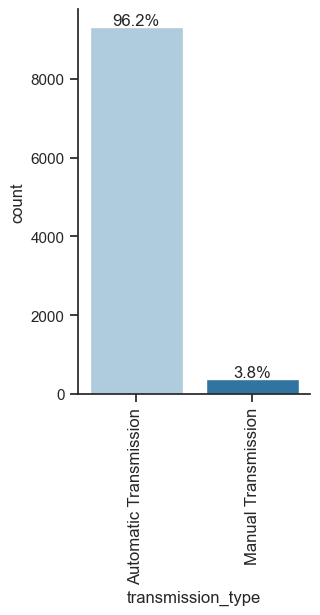

In [140]:
plot_counts(df, 'transmission_type', perc=True)

### üîé Observations: Tranmission Type

Almost all of the listed cars has Autmatic Transmission.

### Regional Specs

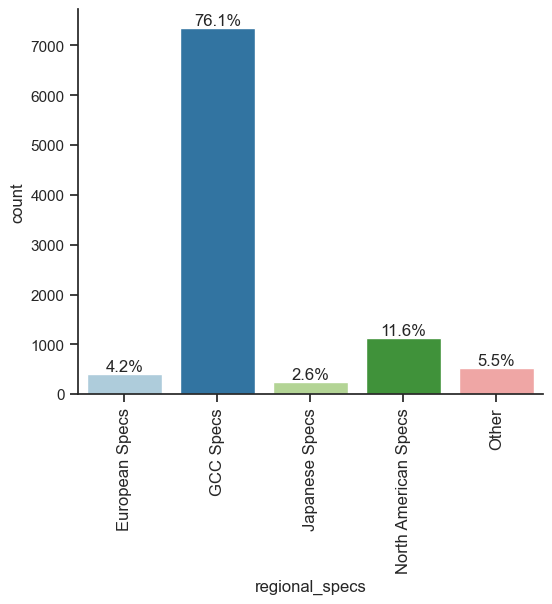

In [141]:
plot_counts(df, 'regional_specs', perc=True)

### Hoursepower

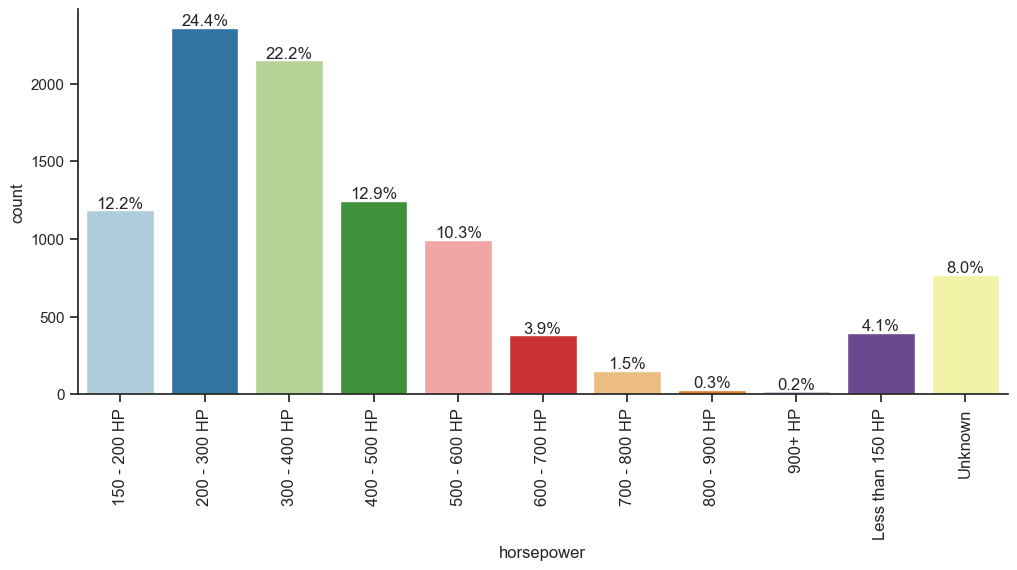

In [142]:
plot_counts(df, 'horsepower', perc=True)

### Emirate

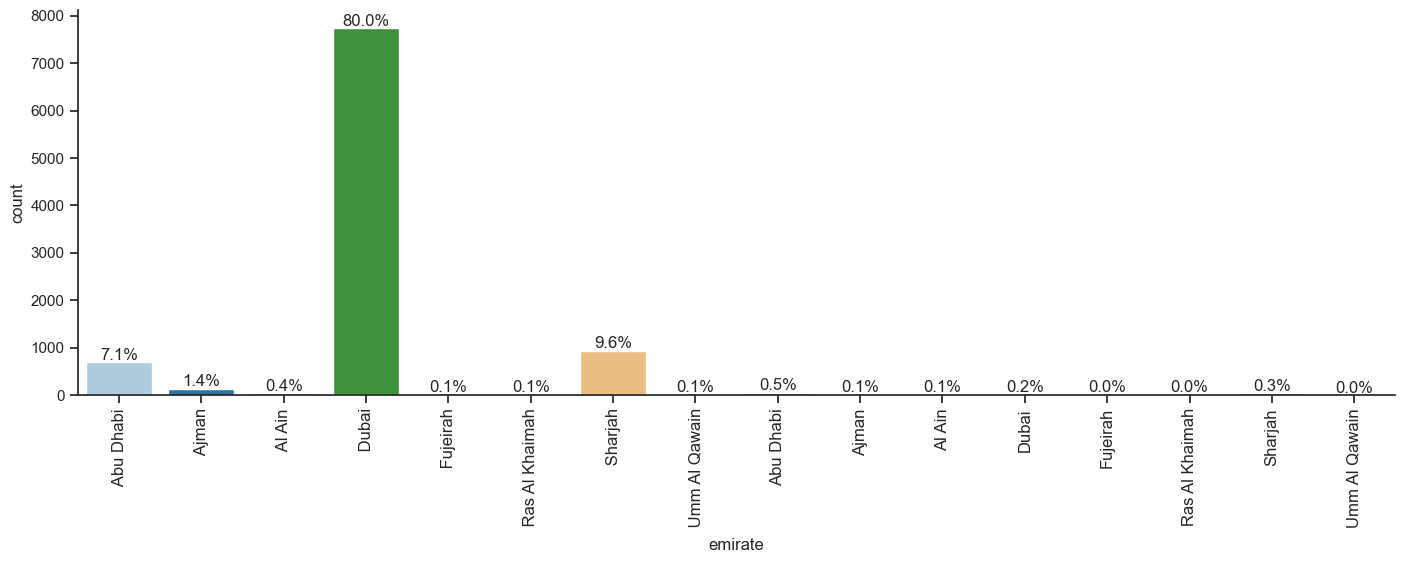

In [143]:
plot_counts(df, 'emirate', perc=True)

In [144]:
df['emirate'].value_counts()

 Dubai             7736
 Sharjah            931
 Abu Dhabi          686
 Ajman              135
Abu Dhabi            52
 Al Ain              34
Sharjah              32
Dubai                21
 Ras Al Khaimah      14
Ajman                 7
 Umm Al Qawain        6
Al Ain                6
 Fujeirah             5
Ras Al Khaimah        3
Fujeirah              2
Umm Al Qawain         1
Name: emirate, dtype: int64

**emirate** column has spaces at the beginning and the end of it's values which should be removed.

In [145]:
df['emirate'] = df['emirate'].str.strip()
plot_counts(df, 'emirate', perc=True)

## Evaluation

> If we can reach less than XXXXXX at predicting 

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
‚ö†Ô∏è Note: Due to the nature of experimentation, the evaluation metric may change over time.
</div>

In [ ]:
raw_data.info()

In [ ]:
# Keeping the original dataset aside just in case
df = raw_data.copy()
df.head()

In [ ]:
df.tail()

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ‚úçüèº <b>Observations:</b> 
    <ul>
        <li><code>title</code> column is not relevant, so it should be removed.</li>
        <li>The data type of <code>price_in_aed</code> is <code>object</code>, it should be converted into <code>int</code>.</li>
        <li>The same applies for <code>no_of_cylinders</code>.</li>
        <li><code>year</code> should be <code>int</code> not <code>float64</code>.</li>
        <li>I would keep <code>date_posted</code> if we were predicting how much time it would take to sell car or if we had the sold-price after negotiation, but it's a problem for some other time.</li>
    </ul>
</div>

In [ ]:
df.drop(['title', 'date_posted'], axis=1, inplace=True)
df.info()

In [ ]:
# Turn price_in_aed into int
df['price_in_aed'] = df['price_in_aed'].str.replace(',', '').astype(int)

In [ ]:
df.describe()

In [ ]:
def list_feature_types(dataframe):
    '''
        This function returns 2 lists for categorical features and numeric features.
        
        Parameters
        ----------
        dataframe: tabular data in data frame format.
        
        Returns
        ----------
        cat_features: a list of column names in the data frame with categorical values
        nbr_features: a list of column names in the data frame with numeric values
        
        
    '''
    
    cat_features = []
    nbr_features = []

    for feature in dataframe.columns:
        if dataframe[feature].dtype == 'O':
            cat_features.append(feature)
        else:
            nbr_features.append(feature)

    print('Categorical Features (', len(cat_features), '): ', cat_features, '\n', sep='')
    print('Numeric Features (',len(nbr_features),'):', nbr_features, sep='')
    
    return cat_features, nbr_features

In [ ]:
# Create a list of the columns 
cat_features, nbr_features = list_feature_types(df)

### Categorical Features

In [ ]:
# Let's see how many categories each feature has
for feature in cat_features:
    print("\033[1m" + feature + "\033[0m") # to print in bold
    print(df[feature].value_counts(normalize=True))
    print('\n------------------------\n')
    

In [ ]:
def count_plot(dataframe, cat_feature_lits):
    '''
        This function plots the number of values 
        for each category in each categorical feature.
        
        Parameters
        ----------
        dataframe: tabular data in data frame format.
        cat_features: a list of column names in the data frame with categorical values
        
        Returns
        ----------
        
        
    '''
    n_cols = 2 # set the number of columns
    n_rows = int(np.ceil(len(cat_feature_lits)/n_cols)) # set the number of rows with the predefined number of columns
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows)) # width, height of the figure
    
    for i, feature in enumerate(cat_feature_lits):
        row_idx = i // n_cols
        col_idx = i % n_cols
        sb.countplot(data=dataframe, x=feature, ax=axes[row_idx, col_idx])
        axes[row_idx, col_idx].tick_params(axis='x', rotation=30)
    
    plt.tight_layout()
    img_path = 'Images/Categorical_Features.png'
    plt.savefig(img_path) # Save the plot for future use
    plt.show()

In [ ]:
count_plot(df, cat_features)

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ‚úçüèº <b>Observations:</b><a id='cat_eda_obs'></a>
    <ol>
        <li><code>no_of_cylinders</code> column has both Unknown and NULL values which both of them should be dropped.</li>
        <li><code>horsepower</code> has Unknown values which can be dropped or can be filled by checking the specs of the <code>company</code>, <code>model</code> and <code>motors_trim</code>from the internet. Since we have enough data points, it's I'll prefer the easier way and remove them.</li>
        <li><code>emirate</code> column has spaces at the beginning and the end of it's values which should be removed.</li>
        <li><code>motors_trim</code> column has 856 different values which is too much for any kind of encoding.</li>
        <li><code>company</code> column has 73 different values which is too much for any kind of encoding.</li>
        <li><code>model</code> column has 552 different values which is too much for any kind of encoding.</li>
        <li><code>transmission_type</code>, <code>fuel_type</code> and <code>steering_side</code> features imbalanced so the minor classes should be removed, then the columns should be dropped.</li>
        <li>All other specs apart from 'GCC Specs' can be assigned as 'Other' in <code>regional_specs</code> column.</li>
    </ol>
</div>

### Numeric Features

In [ ]:
def dist_plot(dataframe, feature):
    '''
        This function takes the name of the feature and 
        plots the distribution of the numeric values
        both using boxplot and hisplot of seaborn. 
        The purpose is to check if the numeric feature has 
        normal distribution and detect outliers manualy.
        
        Parameters
        ----------
        dataframe: tabular data in data frame format.
        feature: string 
            numeric feature (column) in the data frame. 
        
    '''
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':(0.15, 0.85)})
    
    sb.boxplot(data=dataframe, x=feature, color='lightblue', ax=ax_box)
    ax_box.set_title(feature.replace('_', ' ').capitalize(), fontsize=16)
    ax_box.set_xlabel('')
    
    sb.histplot(data=dataframe, x=feature, kde=True, ax=ax_hist)
    
    # Calculate skewness and kurtosis
    skewness = dataframe[feature].skew()
    kurt = dataframe[feature].kurt()

    # Add skewness and kurtosis as text on the histogram plot
    ax_hist.text(0.95, 0.85, f"Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}", 
                 transform=ax_hist.transAxes, verticalalignment='top', horizontalalignment='right',
                 bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

    
    plt.tight_layout()
    img_path = 'Images/' + feature + '_dist.png'
    plt.savefig(img_path) # Save the plot for future use
    plt.show()

In [ ]:
dist_plot(df, 'price_in_aed')

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ‚úçüèº <b>Observations:</b> The label has many outliers and the data is positively skewed. We'll not accept anything more than 2,000,000 AED.
</div>

In [ ]:
dist_plot(df, 'kilometers')

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ‚úçüèº <b>Observations:</b> It's really hard to interpret any information out of this plot. It's mostly because of the outlier (max value) showed in the boxplot. We'll remove it and re-plot the data to have more information on it. It looks like a human error.
</div>

In [ ]:
np.max(df['kilometers'].values)

In [ ]:
# Removing the max value in kilometers feature to have more meaningful plot
dist_plot(df[df['kilometers'] != 115000000], 'kilometers')

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ‚úçüèº <b>Observations:</b> This feature is also positively skewed. The max value we should accept in the model should be 500,000 KM.
</div>

In [ ]:
dist_plot(df, 'year')

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ‚úçüèº <b>Observations:</b> This feature is negatively skewed. We'll filter it for the cars which are manufactured after 2000.
</div>

In [ ]:
sb.pairplot(data=df[df['kilometers'] != 115000000])
plt.show()

In [ ]:
sb.violinplot(data=df[df['kilometers'] != 115000000], y='price_in_aed', x='horsepower')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#Using pandas methods and slicing to determine the order by decreasing median
my_order = df.groupby(by=["no_of_cylinders"])["price_in_aed"].median().sort_values().iloc[::-1].index

sb.violinplot(data=df[(df['kilometers'] <= 300000) & (df['price_in_aed'] <= 500000)], 
              y='price_in_aed', x='no_of_cylinders', order=my_order)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Data Processing

Firts we'll perform the changes that we mentioned in the [observations](#cat_eda_obs) section of Categorical Feature EDA.

In [ ]:
# Drop null values
df_no_null = df.dropna().reset_index(drop=True)
df_no_null.shape

In [ ]:
# Drop duplicates
df_no_dup = df_no_null.drop_duplicates().reset_index(drop=True)
df_no_dup.shape

In [ ]:
df_no_dup['emirate'] = df_no_dup['emirate'].str.strip()
df_no_dup['emirate'].value_counts(normalize=True)

In [ ]:
df_no_dup.loc[((df_no_dup['emirate'] == 'Ajman') | (df_no_dup['emirate'] == 'Al Ain') | 
               (df_no_dup['emirate'] == 'Ras Al Khaimah') | 
               (df_no_dup['emirate'] == 'Umm Al Qawain') | 
               (df_no_dup['emirate'] == 'Fujeirah')), 'emirate'] = 'Other'
df_no_dup['emirate'].value_counts()

In [ ]:
df_no_dup = df_no_dup[df_no_dup['no_of_cylinders'] != 'Unknown']
df_no_dup.shape

In [ ]:
df_no_dup = df_no_dup[df_no_dup['horsepower'] != 'Unknown']
df_no_dup.shape

In [ ]:
df_no_dup = df_no_dup[df_no_dup['steering_side'] != 'Right Hand Side']
df_no_dup.drop('steering_side', axis=1, inplace=True)
df_no_dup.shape

In [ ]:
df_no_dup = df_no_dup[df_no_dup['transmission_type'] == 'Automatic Transmission']
df_no_dup.drop('transmission_type', axis=1, inplace=True)
df_no_dup.shape

In [ ]:
df_no_dup = df_no_dup[df_no_dup['fuel_type'] == 'Gasoline']
df_no_dup.drop('fuel_type', axis=1, inplace=True)
df_no_dup.shape

In [ ]:
df_no_dup.loc[df_no_dup['regional_specs'] != 'GCC Specs', 'regional_specs'] = 'Other'
df_no_dup['regional_specs'].value_counts()

In [ ]:
# Let's check the distribution after applying some clean up
cat_features, nbr_features = list_feature_types(df_no_dup)
count_plot(df_no_dup, cat_features)

In [ ]:
df_no_dup[['company', 'model', 'motors_trim']].value_counts().shape

In [ ]:
df_no_dup['company'].value_counts()

‚ö†Ô∏è I spent 5 years in Dubai and I had 5 different cars during this period. I also helped a lot of friends to buy/sell their cars on Dubizzle. So I can safe to say that the below mentioned manufacturer are the market dominants:
- mercedes-benz
- nissan
- bmw
- toyota
- ford
- land-rover
- porsche
- audi
- dodge
- jeep
- mitsubishi
- chevrolet
- lexus
- volkswagen
- hyundai
- infiniti

In [ ]:
companies_to_filter = ['mercedes-benz', 'nissan', 'bmw', 'toyota', 'ford', 
                       'land-rover', 'porsche', 'audi', 'dodge', 'jeep', 
                       'mitsubishi', 'chevrolet', 'lexus', 'volkswagen', 'hyundai', 'infiniti']
df_comp = df_no_dup[df_no_dup['company'].isin(companies_to_filter)]
df_comp = df_comp.reset_index(drop=True)
df_comp.shape

In [ ]:
df_comp[['company', 'model', 'motors_trim']].value_counts().shape

‚ö†Ô∏è The 3 main factors that determine the selling price of a car which are its manufacturer, model and engine type. And also, even though tech used for each model and motor trim are almost the same, it's unique for each company. That's why we'll merge these 3 features and make 1 feature instead.

In [ ]:
df_car = df_comp.copy()
df_car['car'] = df_car['company'] + '__' + df_comp['model'] + '__' + df_comp['motors_trim']
df_car.drop(['company', 'model', 'motors_trim'], axis=1, inplace=True)
df_car.shape

In [ ]:
df_car['car'].value_counts().shape

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ‚úçüèº <b>Observations:</b> <a id='car'></a> This feature has 1273 unique values (categories) which shouldn't be encoded with one-hot-encoding since it'll increase the dimentions of the dataframe enormously. It's better to use either Frequency Encoding or Target Encoding.
    The value count of the most of the categories will be highly likely the same. That's why it's not conveniant to use Frequency Encoding. We should continue with Target Encoding.
</div>
    
> By one-hot encoding them, we create a really sparse matrix and inflate the number of dimensions the model needs to work with, and we may fall victim to the dreaded Curse of Dimensionality [1](https://towardsdatascience.com/dealing-with-categorical-variables-by-using-target-encoder-a0f1733a4c69). 

In [ ]:
df_car.info()

In [ ]:
df_car.describe().transpose()

In [ ]:
df_car.reset_index(drop=True, inplace=True)

In [ ]:
# Creating a check point for the dataset
df_checkpoint = df_car.copy()

### Encoding Categorical Features

- car feature will be enoded using `TargetEncoder`.
- horsepower and no_of_cylinders features will be encoded using `OrdinalEncoder` as values have an inherent order or hierarchy.
- The rest of the categorical features will be encoded using One Hot Encoding method.

In [ ]:
car_cat_features = ['body_condition', 'mechanical_condition', 'seller_type', 'body_type',
                   'no_of_cylinders', 'regional_specs', 'horsepower', 'color', 'emirate']

In [ ]:
count_plot(df_car, car_cat_features)

In [ ]:
def encode_cat_feature(df_car):

    # Ordinaly encode some categorical features
    ord_encoder = OrdinalEncoder()
    # This method expects the data in a 2D array format
    df_car['horsepower'] = ord_encoder.fit_transform(df_car['horsepower'].values.reshape(-1, 1))
    df_car['no_of_cylinders'] = ord_encoder.fit_transform(df_car['no_of_cylinders'].values.reshape(-1, 1))
    
    # Dummy encoding other frauters
    dummy_features = ['body_condition', 'mechanical_condition', 'seller_type', 
                                     'body_type', 'regional_specs', 'color', 'emirate']
    df_dummy = pd.get_dummies(df_car[dummy_features], drop_first=True)

    df_car = pd.concat([df_car, df_dummy], axis=1)
    df_car.drop(dummy_features, axis=1, inplace=True)
    
    print(df_car.info())
    
    return df_car

In [ ]:
df_car = encode_cat_feature(df_car)

### Determine the Features and Targets

In [ ]:
x = df_car.drop('price_in_aed', axis=1)
y = df_car['price_in_aed']

print('Shape of features: ', x.shape)
print('Shape of target: ', y.shape)

### Splitting the Dataset

First we'll split the dataset into train and test, then apply data processing not to cause any data leakage.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
print('Train shape:', x_train.shape)
print('Test shape:', x_test.shape)

### Remove Outliers

There is one more step to complete the handling categorical features. That's encoding `car` feature using Target Encoding as mentioned [above](#car). However, before moving further with this step, we need to remove the outliers as it has impact on the mean of the target.

|Min||Feature||Max|
|---|-|:-----:|-|---|
|0|<=|price_in_aed|<=|500000|
|0|<=|kilometers|<=|300000|
|2000|<=|year|<=|2020|

‚ùóÔ∏è First we need to merge `x_train` and `y_train` to remove the same number of datapoints from the training set.

In [ ]:
df_car_train = pd.concat([x_train, y_train.to_frame('price_in_aed')], axis=1)
df_car_train.shape

In [ ]:
df_train_clean = df_car_train[(df_car_train['kilometers'] <= 300000) & 
                 (df_car_train['year'] >= 2000) & (df_car_train['price_in_aed'] <= 500000)]
df_train_clean.info()

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ‚úçüèº <b>Observations:</b> The number of samples didn't impacted a lot.
</div>

In [ ]:
x_train = df_train_clean.drop('price_in_aed', axis=1)
y_train = df_train_clean['price_in_aed']

In [ ]:
from category_encoders import TargetEncoder

In [ ]:
x_train.info()

In [ ]:
x_test.info()

In [ ]:
encoder = TargetEncoder()
encoder.fit(x_train['car'], y_train)
x_train['car_encoded'] = encoder.transform(x_train['car'])
x_train.drop('car', axis=1, inplace=True)
x_test['car_encoded'] = encoder.transform(x_test['car'])
x_test.drop('car', axis=1, inplace=True)
x_train.head()

### Scaling

We'll only scale the numeric features and keep the ordinaly encoded features out of this process. 
>Ordinal encoding assigns integer values to categories based on their order or hierarchy. The assigned labels already represent a meaningful ordinal relationship between the categories. Scaling the ordinal encoded feature may not be necessary for preserving the inherent order.

In [ ]:
x_train[['kilometers', 'year', 'car_encoded']].describe()

In [ ]:
y_train.describe()

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train[['kilometers', 'year', 'car_encoded']])
x_train[['kilometers', 'year', 'car_encoded']] = scaler.transform(x_train[['kilometers', 'year', 'car_encoded']])

In [ ]:
x_test[['kilometers', 'year', 'car_encoded']] = scaler.transform(x_test[['kilometers', 'year', 'car_encoded']])

In [ ]:
scaler.fit(y_train.values.reshape(-1,1))
y_train = scaler.transform(y_train.values.reshape(-1,1))

y_test = scaler.transform(y_test.values.reshape(-1,1))

In [ ]:
x_train.describe()

In [ ]:
x_train.info()

## Modelling

We'll stick with the suggestion bby Scikit Learn and we'll first evaluate 2 different linear models: Lasso and ElasticNet

| <img src='Images/ml_map.png' width=50% alt='Choosing the right estimator'> |
|:--:| 
| [Choosing the right estimator](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) |

Based on the result we'll decide on the model, then we'll fine tune the hyperparameters.

### Selecting the Algorithm

In [ ]:
def evaluate_algorithms(x, y):
    models = []
    models.append(('LS', Lasso()))
    models.append(('EN', ElasticNet(random_state=101)))
    models.append(('SVR', SVR()))
    models.append(('DTR', DecisionTreeRegressor()))
    models.append(('ABR', AdaBoostRegressor()))
    models.append(('RFR', RandomForestRegressor()))
    models.append(('GBR', GradientBoostingRegressor()))
    
    names = []
    results = []
    
    for name, model in models:
        kfold = KFold(n_splits=5, random_state=101, shuffle=True)
        cv_results = cross_val_score(model, x, y, cv=kfold, scoring='r2')
        results.append(cv_results)
        names.append(name)
        msg = '%s - Mean R\u00b2: %.3f STD: %.3f' % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    # Plot the results
    plt.title('Algorithm Comparison', fontsize=16)
    plt.boxplot(results)
    plt.xlabel('Algorithms')
    plt.ylabel('$R^2$ Score')
    plt.xticks(ticks=range(1, len(names)+1), labels=names, fontsize=14)
    plt.show()

In [ ]:
import time as t

start = t.time()
evaluate_algorithms(x_train.values, y_train.ravel())
end = t.time()

print('\nIt took', str(round(end-start, 2)), 'secs. to evaluate 7 algotrihtms with 5-fold cross validation.')

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ‚úçüèº <b>Observations:</b> 
</div>

### Testing

In [ ]:
model = RandomForestRegressor()
model.fit(x_train, y_train.ravel())

y_hat_train = model.predict(x_train)
train_score = r2_score(y_train, y_hat_train)
print('Train R\u00b2:%.3f' % train_score)

y_hat_test = model.predict(x_test)
test_score = r2_score(y_test, y_hat_test)

print('Test R\u00b2:%.3f' % test_score)

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ‚úçüèº <b>Observations:</b> üö® The model suffers from overfitting <b>a lot</b>. Before moving to the hyperparameter tuning, we must fixt this.<br/><br/>
    We'll eliminate some feauture. Selecting relevant features and removing irrelevant or redundant ones can help simplify the model and reduce overfitting.
</div>

### Further Data Processing

In [ ]:
df_car = df_checkpoint.copy()

In [ ]:
#Using pandas methods and slicing to determine the order by decreasing median
my_order = df_car.groupby(by=["no_of_cylinders"])["price_in_aed"].median().sort_values().iloc[::-1].index

sb.boxplot(data=df_car[(df_car['kilometers'] <= 300000) & (df_car['price_in_aed'] <= 500000)], 
              y='price_in_aed', x='no_of_cylinders', order=my_order)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
df_car['no_of_cylinders'].value_counts()

In [ ]:
cylinder_filter = ['4', '6', '8']
df_car = df_car[df['no_of_cylinders'].isin(cylinder_filter)]
df_car.info()

In [ ]:
#Using pandas methods and slicing to determine the order by decreasing median
my_order = df_car.groupby(by=["horsepower"])["price_in_aed"].median().sort_values().iloc[::-1].index

sb.boxplot(data=df_car[(df_car['kilometers'] <= 300000) & (df_car['price_in_aed'] <= 500000)], 
              y='price_in_aed', x='horsepower', order=my_order)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
df_car['horsepower'].value_counts()

In [ ]:
horsepower_filter = ['Less than 150 HP', '200 - 300 HP', '300 - 400 HP', '400 - 500 HP',
                    '500 - 600 HP']

df_car = df_car[df['horsepower'].isin(horsepower_filter)]
df_car.info()

In [ ]:
df_car.describe().transpose()

In [ ]:
df_car.reset_index(drop=True, inplace=True)

In [ ]:
df_car = encode_cat_feature(df_car)

In [ ]:
x = df_car.drop('price_in_aed', axis=1)
y = df_car['price_in_aed']

print('Shape of features: ', x.shape)
print('Shape of target: ', y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
print('Train shape:', x_train.shape)
print('Test shape:', x_test.shape)

df_car_train = pd.concat([x_train, y_train.to_frame('price_in_aed')], axis=1)

df_train_clean = df_car_train[(df_car_train['kilometers'] <= 300000) & 
                 (df_car_train['year'] >= 2000) & (df_car_train['price_in_aed'] <= 500000)]

x_train = df_train_clean.drop('price_in_aed', axis=1)
y_train = df_train_clean['price_in_aed']

encoder = TargetEncoder()
encoder.fit(x_train['car'], y_train)
x_train['car_encoded'] = encoder.transform(x_train['car'])
x_train.drop('car', axis=1, inplace=True)
x_test['car_encoded'] = encoder.transform(x_test['car'])
x_test.drop('car', axis=1, inplace=True)


scaler = StandardScaler()
scaler.fit(x_train[['kilometers', 'year', 'car_encoded']])
x_train[['kilometers', 'year', 'car_encoded']] = scaler.transform(x_train[['kilometers', 'year', 'car_encoded']])
x_test[['kilometers', 'year', 'car_encoded']] = scaler.transform(x_test[['kilometers', 'year', 'car_encoded']])

scaler.fit(y_train.values.reshape(-1,1))
y_train = scaler.transform(y_train.values.reshape(-1,1))

y_test = scaler.transform(y_test.values.reshape(-1,1))

In [ ]:
start = t.time()
evaluate_algorithms(x_train.values, y_train.ravel())
end = t.time()

print('\nIt took', str(round(end-start, 2)), 'secs. to evaluate 7 algotrihtms with 5-fold cross validation.')

In [ ]:
model = RandomForestRegressor()
model.fit(x_train, y_train.ravel())

y_hat_train = model.predict(x_train)
train_score = r2_score(y_train, y_hat_train)
print('Train R\u00b2:%.3f' % train_score)

y_hat_test = model.predict(x_test)
test_score = r2_score(y_test, y_hat_test)

print('Test R\u00b2:%.3f' % test_score)

### Feature Selection

[X] Label encoding to df_car

[X] Target encoding to df_car

[X] Scale the numeric features including Target encoded (if necessary)

[X] Mutual information

In [ ]:
car_cat_features

In [ ]:
df_car = df_checkpoint.copy()

In [ ]:
label_encoder = LabelEncoder()
df_car_encoded = pd.DataFrame()
for feature in car_cat_features:
        df_car_encoded[feature] = label_encoder.fit_transform(df_car[feature])
        
df_car_encoded[car_cat_features].head()

In [ ]:
df_car_encoded['price_in_aed'] = df_car['price_in_aed']
df_car_encoded['kilometers'] = df_car['kilometers']
df_car_encoded['year'] = df_car['year']
df_car_encoded.info()

In [ ]:
target_encoder = TargetEncoder()
df_car_encoded['car_encoded'] = target_encoder.fit_transform(df_car['car'], df_car['price_in_aed'])
df_car_encoded.describe()

In [ ]:
scaler = StandardScaler()
df_car_encoded[['kilometers', 'year', 'car_encoded']] = scaler.fit_transform(df_car_encoded[['kilometers', 'year', 'car_encoded']])
df_car_encoded.describe()

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [ ]:
fs = SelectKBest(score_func=mutual_info_regression, k='all')
fs.fit(df_car_encoded.drop('price_in_aed', axis=1), df_car_encoded['price_in_aed'])
features = fs.transform(df_car_encoded.drop('price_in_aed', axis=1))
df_mutual_info = pd.DataFrame(columns=['Feature', 'Score'])

for i in range(len(fs.scores_)):
    new_row = pd.DataFrame({'Feature': df_car_encoded.drop('price_in_aed', axis=1).columns[i], 'Score': fs.scores_[i]}, index=[0])
    df_mutual_info = pd.concat([new_row, df_mutual_info], axis=0, ignore_index=True)
    
sb.barplot(data=df_mutual_info, x='Feature', y='Score')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_mutual_info.info()

In [ ]:
df_mutual_info.sort_values(by=['Score'], ascending=False).head(10)

In [ ]:
from sklearn.feature_selection import f_regression

In [ ]:
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(df_car_encoded.drop('price_in_aed', axis=1), df_car_encoded['price_in_aed'])
features_freg = fs.transform(df_car_encoded.drop('price_in_aed', axis=1))
df_freg_info = pd.DataFrame(columns=['Feature', 'Score'])

for i in range(len(fs.scores_)):
    new_row = pd.DataFrame({'Feature': df_car_encoded.drop('price_in_aed', axis=1).columns[i], 'Score': fs.scores_[i]}, index=[0])
    df_freg_info = pd.concat([new_row, df_freg_info], axis=0, ignore_index=True)
    
sb.barplot(data=df_freg_info, x='Feature', y='Score')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_freg_info.sort_values(by=['Score'], ascending=False).head(10)

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ‚úçüèº <b>Observations:</b> the top 5 features of <code>mutual_info_regression</code> and <code>f_regression</code> methods are different. That's why we'll give them both a chance and compare how accurate results these features subsets will produce.
</div>

In [ ]:
# Starting the row number from 1 as df_car doesn't have car_encoded feature.
# Target encoding will be done after splitting the dataframes with new feature sets into train and test
# car feature feature will be added to the arrays to be encoded later
freg_features = df_freg_info.sort_values(by=['Score'], ascending=False).iloc[1:5, 0].values
freg_features = np.append(freg_features, 'car')
print('f_Regression Features: ', freg_features)
mutual_features = df_mutual_info.sort_values(by=['Score'], ascending=False).iloc[1:5, 0].values
mutual_features = np.append(mutual_features, 'car')
print('Mutual Infor Regression Features:', mutual_features)

In [ ]:
df_freg = df_car[freg_features].copy()
df_freg['price_in_aed'] = df_car['price_in_aed']
df_freg.info()

In [ ]:
df_mutual = df_car[mutual_features].copy()
df_mutual['price_in_aed'] = df_car['price_in_aed']
df_mutual.info()

In [ ]:
# Ordinaly encode some categorical features
ord_encoder = OrdinalEncoder()
# This method expects the data in a 2D array format
df_mutual['horsepower'] = ord_encoder.fit_transform(df_mutual['horsepower'].values.reshape(-1, 1))
df_dummy = pd.get_dummies(df_car['seller_type'], drop_first=True)
df_mutual = pd.concat([df_mutual, df_dummy], axis=1)
df_mutual.drop('seller_type', axis=1, inplace=True)
    
x = df_mutual.drop('price_in_aed', axis=1)
y = df_mutual['price_in_aed']

print('Shape of features: ', x.shape)
print('Shape of target: ', y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
print('Train shape:', x_train.shape)
print('Test shape:', x_test.shape)

df_car_train = pd.concat([x_train, y_train.to_frame('price_in_aed')], axis=1)

df_train_clean = df_car_train[(df_car_train['kilometers'] <= 300000) & 
                 (df_car_train['year'] >= 2000) & (df_car_train['price_in_aed'] <= 500000)]

x_train = df_train_clean.drop('price_in_aed', axis=1)
y_train = df_train_clean['price_in_aed']

encoder = TargetEncoder()
encoder.fit(x_train['car'], y_train)
x_train['car_encoded'] = encoder.transform(x_train['car'])
x_train.drop('car', axis=1, inplace=True)
x_test['car_encoded'] = encoder.transform(x_test['car'])
x_test.drop('car', axis=1, inplace=True)


scaler = StandardScaler()
scaler.fit(x_train[['kilometers', 'year', 'car_encoded']])
x_train[['kilometers', 'year', 'car_encoded']] = scaler.transform(x_train[['kilometers', 'year', 'car_encoded']])
x_test[['kilometers', 'year', 'car_encoded']] = scaler.transform(x_test[['kilometers', 'year', 'car_encoded']])

scaler.fit(y_train.values.reshape(-1,1))
y_train = scaler.transform(y_train.values.reshape(-1,1))

y_test = scaler.transform(y_test.values.reshape(-1,1))

In [ ]:
start = t.time()
evaluate_algorithms(x_train.values, y_train.ravel())
end = t.time()

print('\nIt took', str(round(end-start, 2)), 'secs. to evaluate 7 algotrihtms with 5-fold cross validation.')

In [ ]:
model = RandomForestRegressor()
model.fit(x_train, y_train.ravel())

y_hat_train = model.predict(x_train)
train_score = r2_score(y_train, y_hat_train)
print('Train R\u00b2:%.3f' % train_score)

y_hat_test = model.predict(x_test)
test_score = r2_score(y_test, y_hat_test)

print('Test R\u00b2:%.3f' % test_score)

In [ ]:
df.info()

In [ ]:
cols = ["body_type","regional_specs","seller_type","horsepower","fuel_type","color","emirate","motors_trim","company","model"]
for i in df_no_dup[cols]:
    df_2=pd.get_dummies(df_no_dup, columns=[i], drop_first=True)
    df_2.drop(i, axis=1, inplace=True)
df_2.info()

In [ ]:
df_2.columns

In [ ]:
df_no_dup.columns

In [ ]:
cols[1]

In [ ]:
OEncoder = OrdinalEncoder()
obj = df_no_dup.select_dtypes("object")
num = df_no_dup.select_dtypes(["float64","int64"])
for i in obj:
    if i in ["body_condition", "mechanical_condition"]:
        df_2[i] = OEncoder.fit_transform(df_2[i].values.reshape(-1,1))

In [ ]:
df_2.head()

In [ ]:
X = df_2.drop('price_in_aed', axis=1)
y = df_2['price_in_aed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)